# 데이터 분석 프로젝트 - 한국인의 삶을 파악하라 !

## 09-1 '한국복지패널 데이터' 분석 준비하기

### 1~2. 데이터 준비 및 패키지 설치 및 로드하기

In [ ]:
# install pyreadstat
# pip install pyreadstat

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '300',
                    'figure.figsize' : [8, 6],
                    'font.size' : 13,
                    'font.family' : 'sans-serif'})

In [ ]:
# load package
import pandas as pd
import numpy as np
import seaborn as sns

### 3. 데이터 불러오기

In [ ]:
# load data
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')

In [ ]:
# make copy
welfare = raw_welfare.copy()

### 4. 데이터 검토하기

In [ ]:
# 앞부분, 뒷부분 출력
welfare

In [ ]:
# 행, 열 개수
welfare.shape

In [ ]:
# 변수 속성 출력
welfare.info()

In [ ]:
# 요약 통계량
welfare.describe()

### 5. 변수명 바꾸기

In [ ]:
welfare = welfare.rename(
columns = {'h14_g3'   : 'sex',
          'h14_g4'    : 'birth',
          'h14_g10'   : 'marriage_type',
          'h14_g11'   : 'religion',
          'p1402_8aq1': 'income',
          'h14_eco9'  : 'code_job',
          'h14_reg7'  : 'code_region'})

## 09-2 성별에 따른 월급 차이 - 성별에 따라 월급이 다를까 ?

### Do it 실습 - 성별 검수 검토 및 전처리하기

#### 1. 변수 검토하기

In [ ]:
welfare['sex'].dtypes   # 변수 타입 출력

In [ ]:
welfare['sex'].value_counts()   # 빈도 구하기

#### 2. 전처리하기


In [ ]:
# find outlier
welfare['sex'].value_counts()

In [ ]:
# delete outlier
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])

# check outlier
welfare['sex'].isna().sum()

In [ ]:
# name gender
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

# 빈도 찾기
welfare['sex'].value_counts()

In [ ]:
# countplot
sns.countplot(data = welfare, x = 'sex')

### 월급 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [ ]:
welfare['income'].dtypes   # type print

In [ ]:
welfare['income'].describe()

In [ ]:
sns.histplot(data = welfare, x = 'income')

#### 2. 전처리하기

In [ ]:
welfare['income'].describe()    # find outlier

In [ ]:
welfare['income'].isna().sum()

In [ ]:
# 이상치 결측 처리
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

# 결측치 확인
welfare['income'].isna().sum()

### 성별에 따른 월급 차이 분석하기

#### 1. 성별 평균 월급표 만들기

In [ ]:
# 성별 평균 월급표 만들기
sex_income = welfare.dropna(subset = ['income'])\
    .groupby('sex', as_index = False) \
    .agg(mean_income = ('income', 'mean'))

sex_income

#### 2. 그래프 만들기

In [ ]:
# barplot
sns.barplot(data = sex_income, x = 'sex', y = 'mean_income')

## 09-3 나이와 월급의 관계 - 몇 살 때 월급을 가장 많이 받을까

### 나이 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [ ]:
welfare['birth'].dtypes

In [ ]:
welfare['birth'].describe()

In [ ]:
sns.histplot(data = welfare, x = 'birth')

#### 2. 전처리

In [ ]:
welfare['birth'].describe()  # chech outlier

In [ ]:
welfare['birth'].isna().sum()

In [ ]:
# 이상치 결측 처리
welfare['birth'] = np.where(welfare['birth'] == 9999, np.nan, welfare['birth'])

# check outlier
welfare['birth'].isna().sum()

#### 3. 파생변수 만들기 - 나이

In [ ]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)
welfare['age'].describe()

In [ ]:
sns.histplot(data = welfare, x = 'age')

### 나이와 월급의 관계 분석하기

#### 1. 나이에 따른 월급 평균표 만들기

In [ ]:
# 나이별 월급 평균 표 만들기
age_income = welfare.dropna(subset = ['income'])\
    .groupby('age')\
    .agg(mean_income = ('income', 'mean'))

age_income.head()

#### 2. 그래프 만들기

In [ ]:
# make linear graph
sns.lineplot(data = age_income, x = 'age', y = 'mean_income')

## 09-4. 연령대에 따른 월급 차이 - 어느 연령대의 월급이 가장 많을까

### 연령대 변수 및 전처리하기

In [ ]:
#### 파생변수 만들기 - 연령대

In [ ]:
# 나이 변수 살펴보기
welfare['age'].head()

In [ ]:
# 연령대 변수 만들기
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                        np.where(welfare['age'] <= 59, 'middle',
                                                'old')))

In [ ]:
# 빈도 구하기
welfare['ageg'].value_counts()

In [ ]:
# count plot
sns.countplot(data = welfare, x = 'ageg')

### 연령대에 따른 월급 차이 분석하기

#### 1. 연령대별 월급 평균표 만들기

In [ ]:
# 연령대별 월급 평균표 만들기
ageg_income = welfare.dropna(subset = ['income'])\
.groupby('ageg', as_index = False)\
.agg(mean_income = ('income', 'mean'))

In [ ]:
ageg_income

#### 2. 그래프 만들기

In [ ]:
# bar plot
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income')

In [ ]:
# sort plot
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income',
           order = ['young', 'middle', 'old'])

## 09-5 연령대 및 성별 월급 차이 - 성별 월급 차이는 연령대별로 다를까 ?

### 연령대 및 성별 월급 평균표 작성하기

#### 1. 연령대 및 성별 월급 평균표 만들기

In [ ]:
# 연령대 및 성별 평균표 만들기
sex_income = \
welfare.dropna(subset = ['income']) \
.groupby('ageg', as_index = False) \
.agg(mean_income = ('income', 'mean'))

In [ ]:
ageg_income

#### 2. 그래프 만들기

In [ ]:
# barplot
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income')

In [ ]:
# sort bar
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income',
           order = ['young', 'middle', 'old'])

## 09-5 연령대 및 성별 월급 차이 - 성별 월급 차이는 연령대별로 다를까 ?

### 연령대 및 성별 월급 차이 분석하기

#### 1. 연령대 및 성별 월급 평균표 만들기

In [ ]:
# 연령대 및 성별 월급 표 만들기
sex_income = \
welfare.dropna(subset = ['income']) \
.groupby(['ageg', 'sex'], as_index = False) \
.agg(mean_income = ('income', 'mean'))

In [ ]:
sex_income

#### 2. 그래프 만들기

In [ ]:
# barplot
sns.barplot(data = sex_income, x = 'ageg', y = 'mean_income', hue = 'sex',
           order = ['young', 'middle', 'old'])

### 나이 및 성별 월급 차이 분석하기

In [ ]:
# 나이 및 성별 월급 평균표 만들기
sex_age = welfare.dropna(subset = ['income']) \
.groupby(['age', 'sex'], as_index = False) \
.agg(mean_income = ('income', 'mean'))

In [ ]:
sex_age

In [ ]:
# line plot
sns.lineplot(data = sex_age, x = 'age',y = 'mean_income', hue = 'sex')

## 09-6 직업별 월급 차이 - 어떤직업이 월급을 가장 많이 받을까 ?

### 직업 변수 검토 및 전처리

#### 1. 변수 검토하기

In [ ]:
welfare['code_job'].dtypes

In [ ]:
welfare['code_job'].value_counts()

#### 2. 전처리하기

In [ ]:
list_job = pd.read_excel('Koweps_Codebook_2019.xlsx', sheet_name = '직종코드')
list_job.head()

In [ ]:
list_job

In [ ]:
list_job.shape

In [ ]:
# welfare에 list_job 결합하기
welfare = welfare.merge(list_job, how = 'left', on = 'code_job')

In [ ]:
welfare

### 직업별 월급 차이 분석하기

#### 1. 직업별 월급 평균표 만들기

In [ ]:
# code_job 결측치 제거 후 code_job, job 출력
job_income = welfare.dropna(subset = ['job', 'income']) \
.groupby('job', as_index = False) \
.agg(mean_income = ('income', 'mean'))

job_income.head()

#### 3. 그래프 만들기

#### (1) 월급이 많은 직업

In [ ]:
# 상위 10위 노출
top10 = job_income.sort_values('mean_income', ascending = False).head(10)
top10

In [ ]:
# 맑음 고딕 폰트 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'AppleGothic'})

In [ ]:
# barplot
sns.barplot(data = top10, y = 'job', x = 'mean_income')

#### (2) 월급이 적은 직업

In [ ]:
### 하위 10위 추출
bottom10 = job_income.sort_values('mean_income').head(10)

In [ ]:
bottom10

In [ ]:
# bar plot
sns.barplot(data = bottom10, y = 'job', x = 'mean_income')\
.set(xlim = (0, 800))

## 09-7 성별 직업 빈도 - 성별로 어떤 직업이제일 많을까?

### 성별 직업 빈도 분석하기

#### 1. 성별 직업 빈도표 만들기

In [ ]:
# 남성 직업 빈도 상위 10
# job 결측치 제거
# male 추출
# job별 분리
# job 빈도 구하기
# 내림차순 정렬
# 상위 10행 추출
job_male = welfare.dropna(subset = ['job']) \
                  .query('sex == "male"') \
                  .groupby('job', as_index = False) \
                  .agg(n = ('job', 'count')) \
                  .sort_values('n', ascending = False) \
                  .head(10)
job_male

In [ ]:
## 여성 직업 빈도 상위 10개 추출

# job 결측치 제거
# female 추출
# job별 분리
# job 빈도 구하기
# 내림차순 정렬
# 상위 10행 추출
job_female = welfare.dropna(subset = ['job']) \
                    .query('sex == "female"') \
                    .groupby('job', as_index = False) \
                    .agg(n = ('job', 'count')) \
                    .sort_values('n', ascending = False) \
                    .head(10)
job_female

#### 2. 그래프 만들기

In [ ]:
# 남성 직업 빈도 막대 그래프 만들기
sns.barplot(data = job_male, y = 'job', x = 'n').set(xlim = (0, 800))

In [ ]:
sns.barplot(data = job_female, y = 'job', x = 'n').set(xlim = (0, 500))

## 09-8 종교 유무에 따른 이혼율 - 종교가 있으면 이혼을 덜 할까 ?

### 종교 변수 검토 및 전처리

#### 1. 변수검토하기

In [ ]:
welfare['religion'].dtypes

In [ ]:
welfare['religion'].value_counts()

#### 2. 전처리

In [ ]:
# 종교 유무 이름 부여
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')

# 빈도 구하기
welfare['religion'].value_counts()

In [ ]:
# barplot
sns.countplot(data = welfare, x = 'religion')

### 혼인 상태 변수 및 검토 및 전처리하기

#### 1. 변수 검토하기

In [ ]:
welfare['marriage_type'].dtypes

In [ ]:
welfare['marriage_type'].value_counts()

#### 2. 파생변수 만들기 - 이혼 여부

In [ ]:
# 이혼여부 변수 만들기
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage',
                              np.where(welfare['marriage_type'] == 3, 'divorce',
                                      'etc'))

In [ ]:
# 이혼 여부별 빈도
n_divorce = welfare.groupby('marriage', as_index = False)\
.agg(n = ('marriage', 'count'))

n_divorce

In [ ]:
# barplot
sns.barplot(data = n_divorce, x = 'marriage', y = 'n')

### 종교 유무에 따른 이혼율 분석하기

#### 1. 종교 유무에 따른 이혼율표 만들기

In [ ]:
real_div = welfare.query('marriage != "etc"') \
.groupby('religion', as_index = False)\
['marriage'] \
.value_counts(normalize = True)

real_div

#### 2. 그래프 만들기

In [ ]:
real_div = real_div.query('marriage == "divorce"') \
.assign(proportion = real_div['proportion'] * 100) \
.round(1)

real_div

In [ ]:
sns.barplot(data = real_div, x = 'religion', y = 'proportion')

### 연령대 및 종교 유무에 따른 이혼율 분석하기

#### 1. 연령대별 이혼율표 만들기

In [ ]:
age_div = welfare.query('marriage != "etc"') \
.groupby('ageg', as_index = False)\
['marriage']\
.value_counts(normalize = True)

age_div

In [ ]:
# 연령대 및 이혼 여부별 빈도
age_div = welfare.query('marriage != "etc"') \
.groupby('ageg', as_index = False)\
['marriage']\
.value_counts()

In [ ]:
age_div

#### 2. 연령대별 이혼률 그래프 만들기

In [ ]:
# 초년층 제외, 이혼 추출
# 백분율로 바꾸기
# 반올림
age_div = age_div.query('ageg != "young" & marriage == "divorce"') \
                 .assign(proportion = age_div['proportion'] * 100) \
                 .round(1)
age_div

In [ ]:
sns.barplot(data = age_div, x = "ageg", y = 'proportion')

### 3. 연령대 및 종교 유무에 따른 이혼율표 만들기

In [ ]:
# etc 제외, 초년층 제외
# ageg, religion별 분리
# marriage 추출
# 비율 구하기
age_rel_div = welfare.query('marriage != "etc" & ageg != "young"') \
                     .groupby(['ageg', 'religion'], as_index = False) \
                     ['marriage'] \
                     .value_counts(normalize = True)
           
age_rel_div


In [ ]:
#### 4. 연령대 및 종교 유무에 따른 이혼율 그래프 만들기
# divorce 추출
# 백분율로 바꾸기
# 반올림
age_rel_div = age_rel_div.query('marriage == "divorce"') \
                         .assign(proportion = age_rel_div['proportion'] * 100) \
                         .round(1)
                         
age_rel_div

In [ ]:
# 막대 그래프 만들기
sns.barplot(data = rel_div, x = "religion", y = 'proportion')


# 09-9 지역별 연령대 비율 - 어느 지역에 노년층이 많을까 ?

In [ ]:
welfare['code_region'].dtypes  # 변수 타입 출력

In [ ]:
welfare['code_region'].value_counts()  # 빈도 구하기


In [ ]:
# 지역 코드 목록 만들기
list_region = pd.DataFrame({'code_region' : [1, 2, 3, 4, 5, 6, 7],
                            'region'      : ['서울',
                                             '수도권(인천/경기)',
                                             '부산/경남/울산',
                                             '대구/경북',
                                             '대전/충남',
                                             '강원/충북',
                                             '광주/전남/전북/제주도']})
list_region

In [ ]:
# 지역명 변수 추가
welfare = welfare.merge(list_region, how = 'left', on = 'code_region')
welfare[['code_region', 'region']].head()


In [ ]:
# region별 분리
# ageg 추출
# 비율 구하기
region_ageg = welfare.groupby('region', as_index = False) \
                     ['ageg'] \
                     .value_counts(normalize = True)
region_ageg

In [ ]:
# 백분율로 바꾸기
# 반올림
region_ageg = region_ageg.assign(proportion = region_ageg['proportion'] * 100) \
                         .round(1)
region_ageg

In [ ]:
# 막대 그래프 만들기
sns.barplot(data = region_ageg, y = 'region', x = 'proportion', hue = 'ageg')

In [ ]:
# 피벗
pivot_df = region_ageg[['region', 'ageg', 'proportion']].pivot(index   = 'region',
                                                               columns = 'ageg',
                                                               values  = 'proportion')
pivot_df

In [ ]:
# 가로 막대 그래프 만들기
pivot_df.plot.barh(stacked = True)


In [ ]:
# 노년층 비율 기준 정렬, 변수 순서 바꾸기
reorder_df = pivot_df.sort_values('old')[['young', 'middle', 'old']]
reorder_df


In [ ]:

# 누적 가로 막대 그래프 만들기
reorder_df.plot.barh(stacked = True)

### 연령대 변수 및 전처리하기

#### 파생변수 만들기 - 연령대

In [35]:
# 나이 변수 살펴보기
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [36]:
# 연령대 변수 만들기
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                        np.where(welfare['age'] <= 59, 'middle',
                                                'old')))

In [37]:
# 빈도 구하기
welfare['ageg'].value_counts()

old       5955
middle    4963
young     3500
Name: ageg, dtype: int64

<AxesSubplot:xlabel='ageg', ylabel='count'>

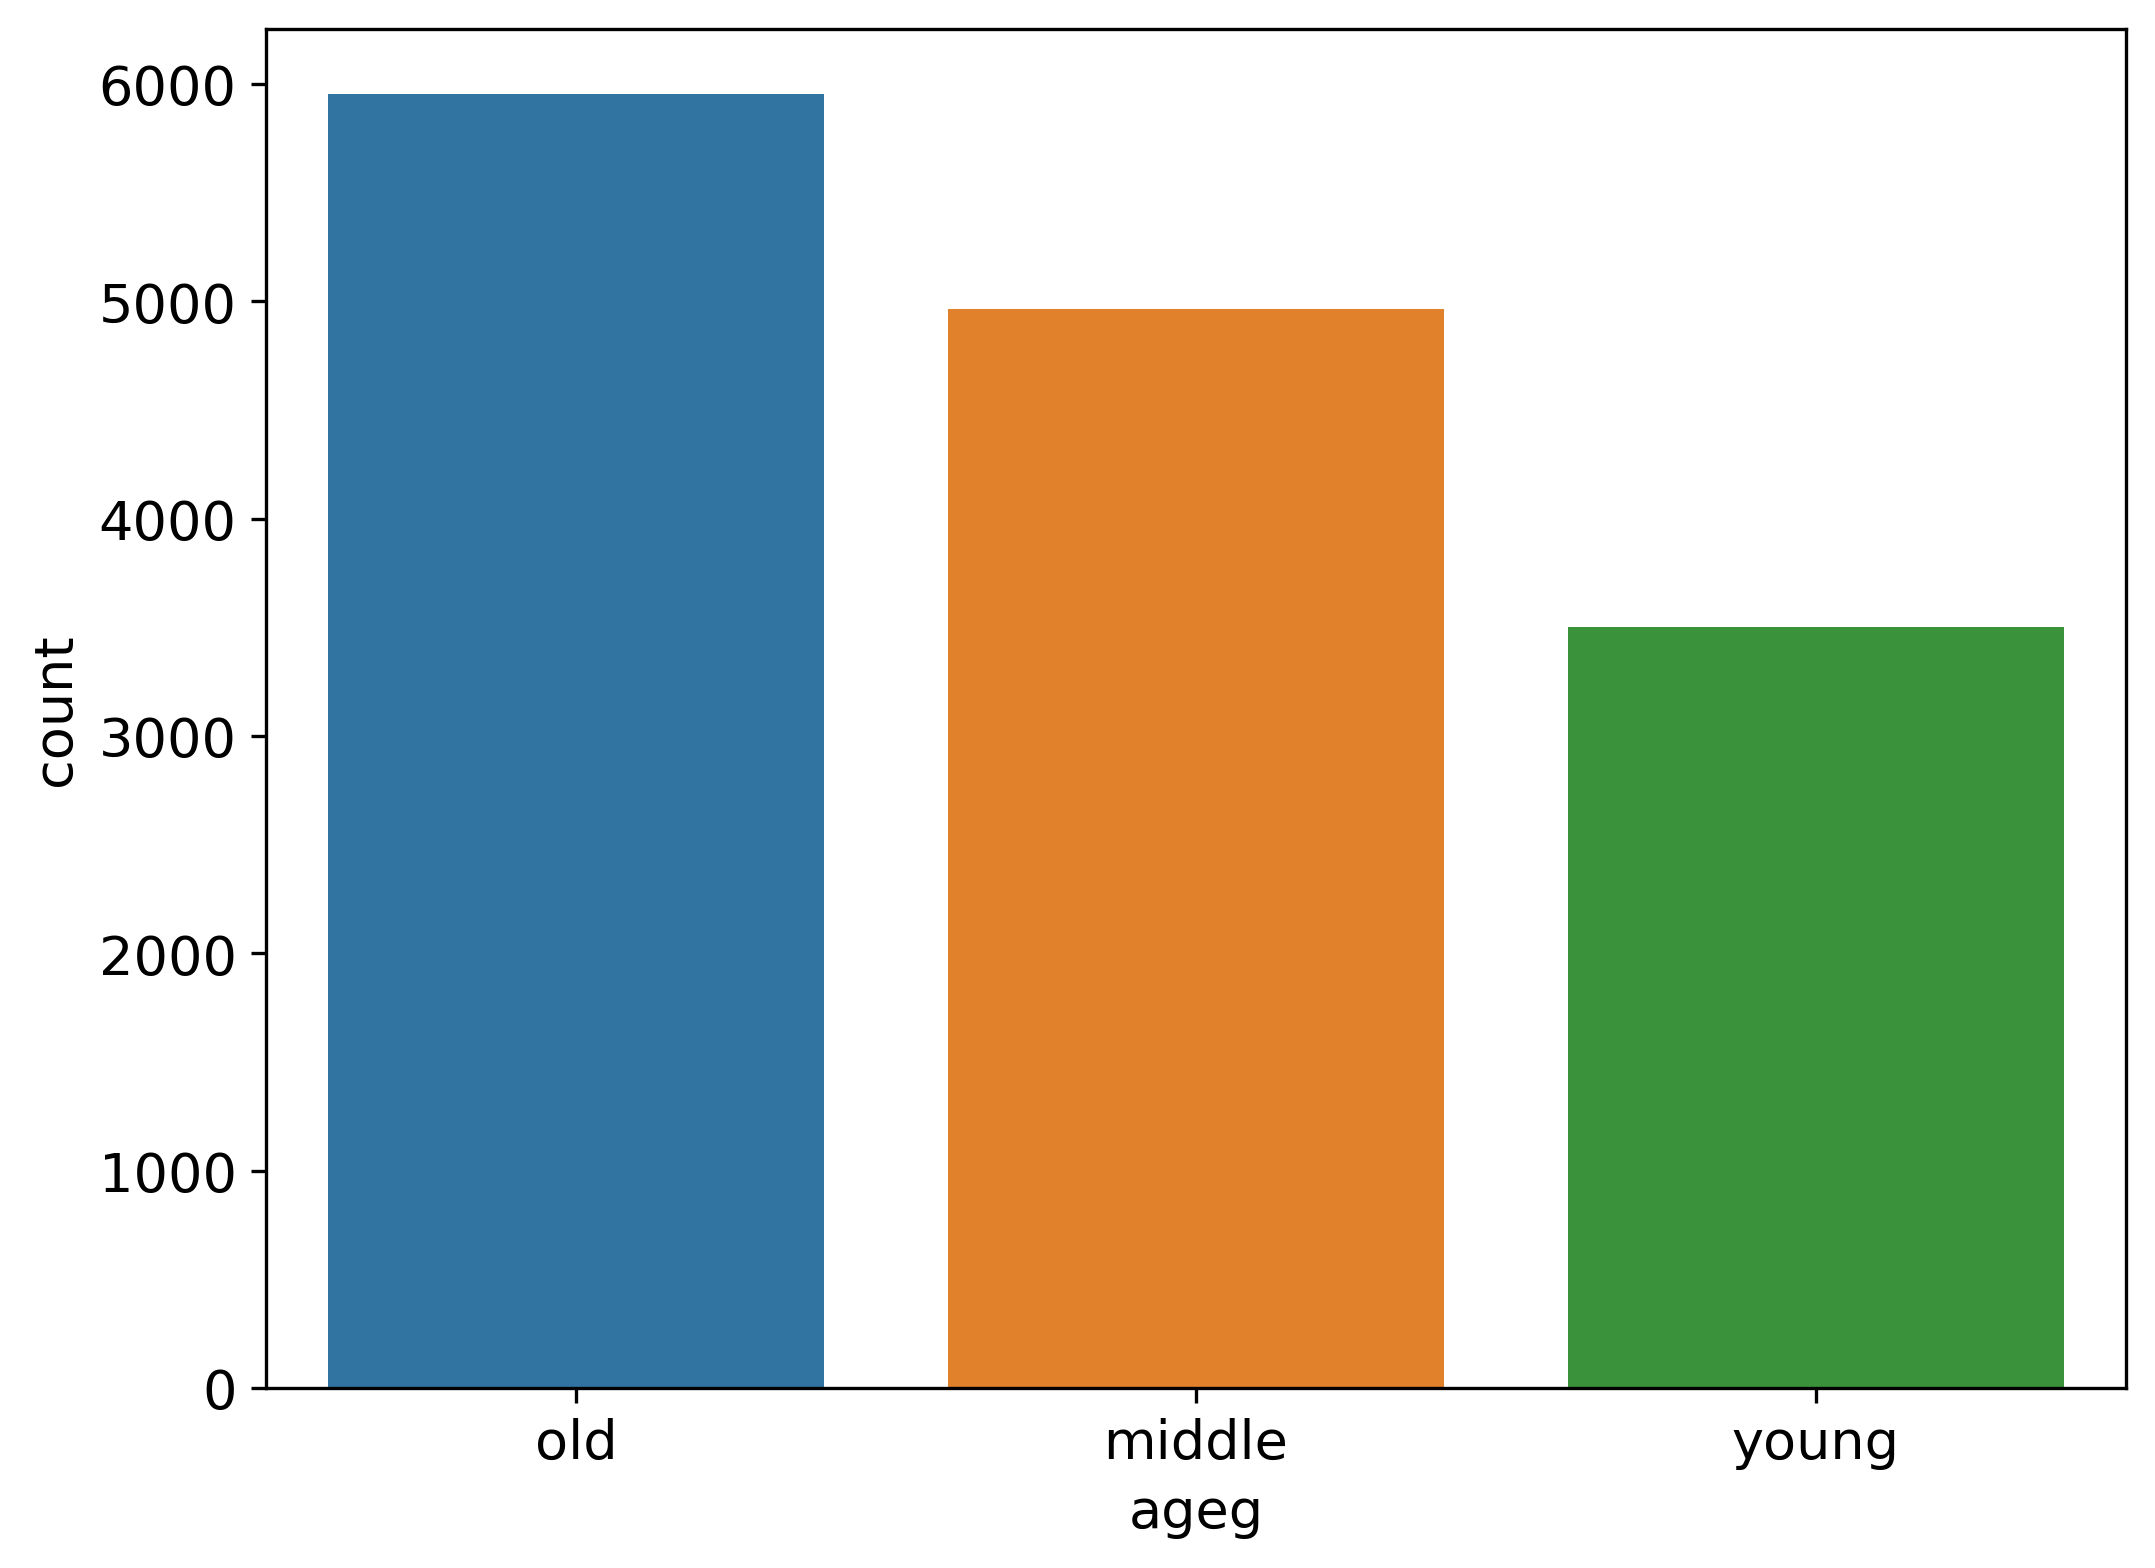

In [38]:
# count plot
sns.countplot(data = welfare, x = 'ageg')

### 연령대에 따른 월급 차이 분석하기

#### 1. 연령대별 월급 평균표 만들기

In [39]:
# 연령대별 월급 평균표 만들기
ageg_income = welfare.dropna(subset = ['income'])\
.groupby('ageg', as_index = False)\
.agg(mean_income = ('income', 'mean'))

In [40]:
ageg_income

,ageg,mean_income
0,middle,329.157157
1,old,140.129003
2,young,195.663424


#### 2. 그래프 만들기

<AxesSubplot:xlabel='ageg', ylabel='mean_income'>

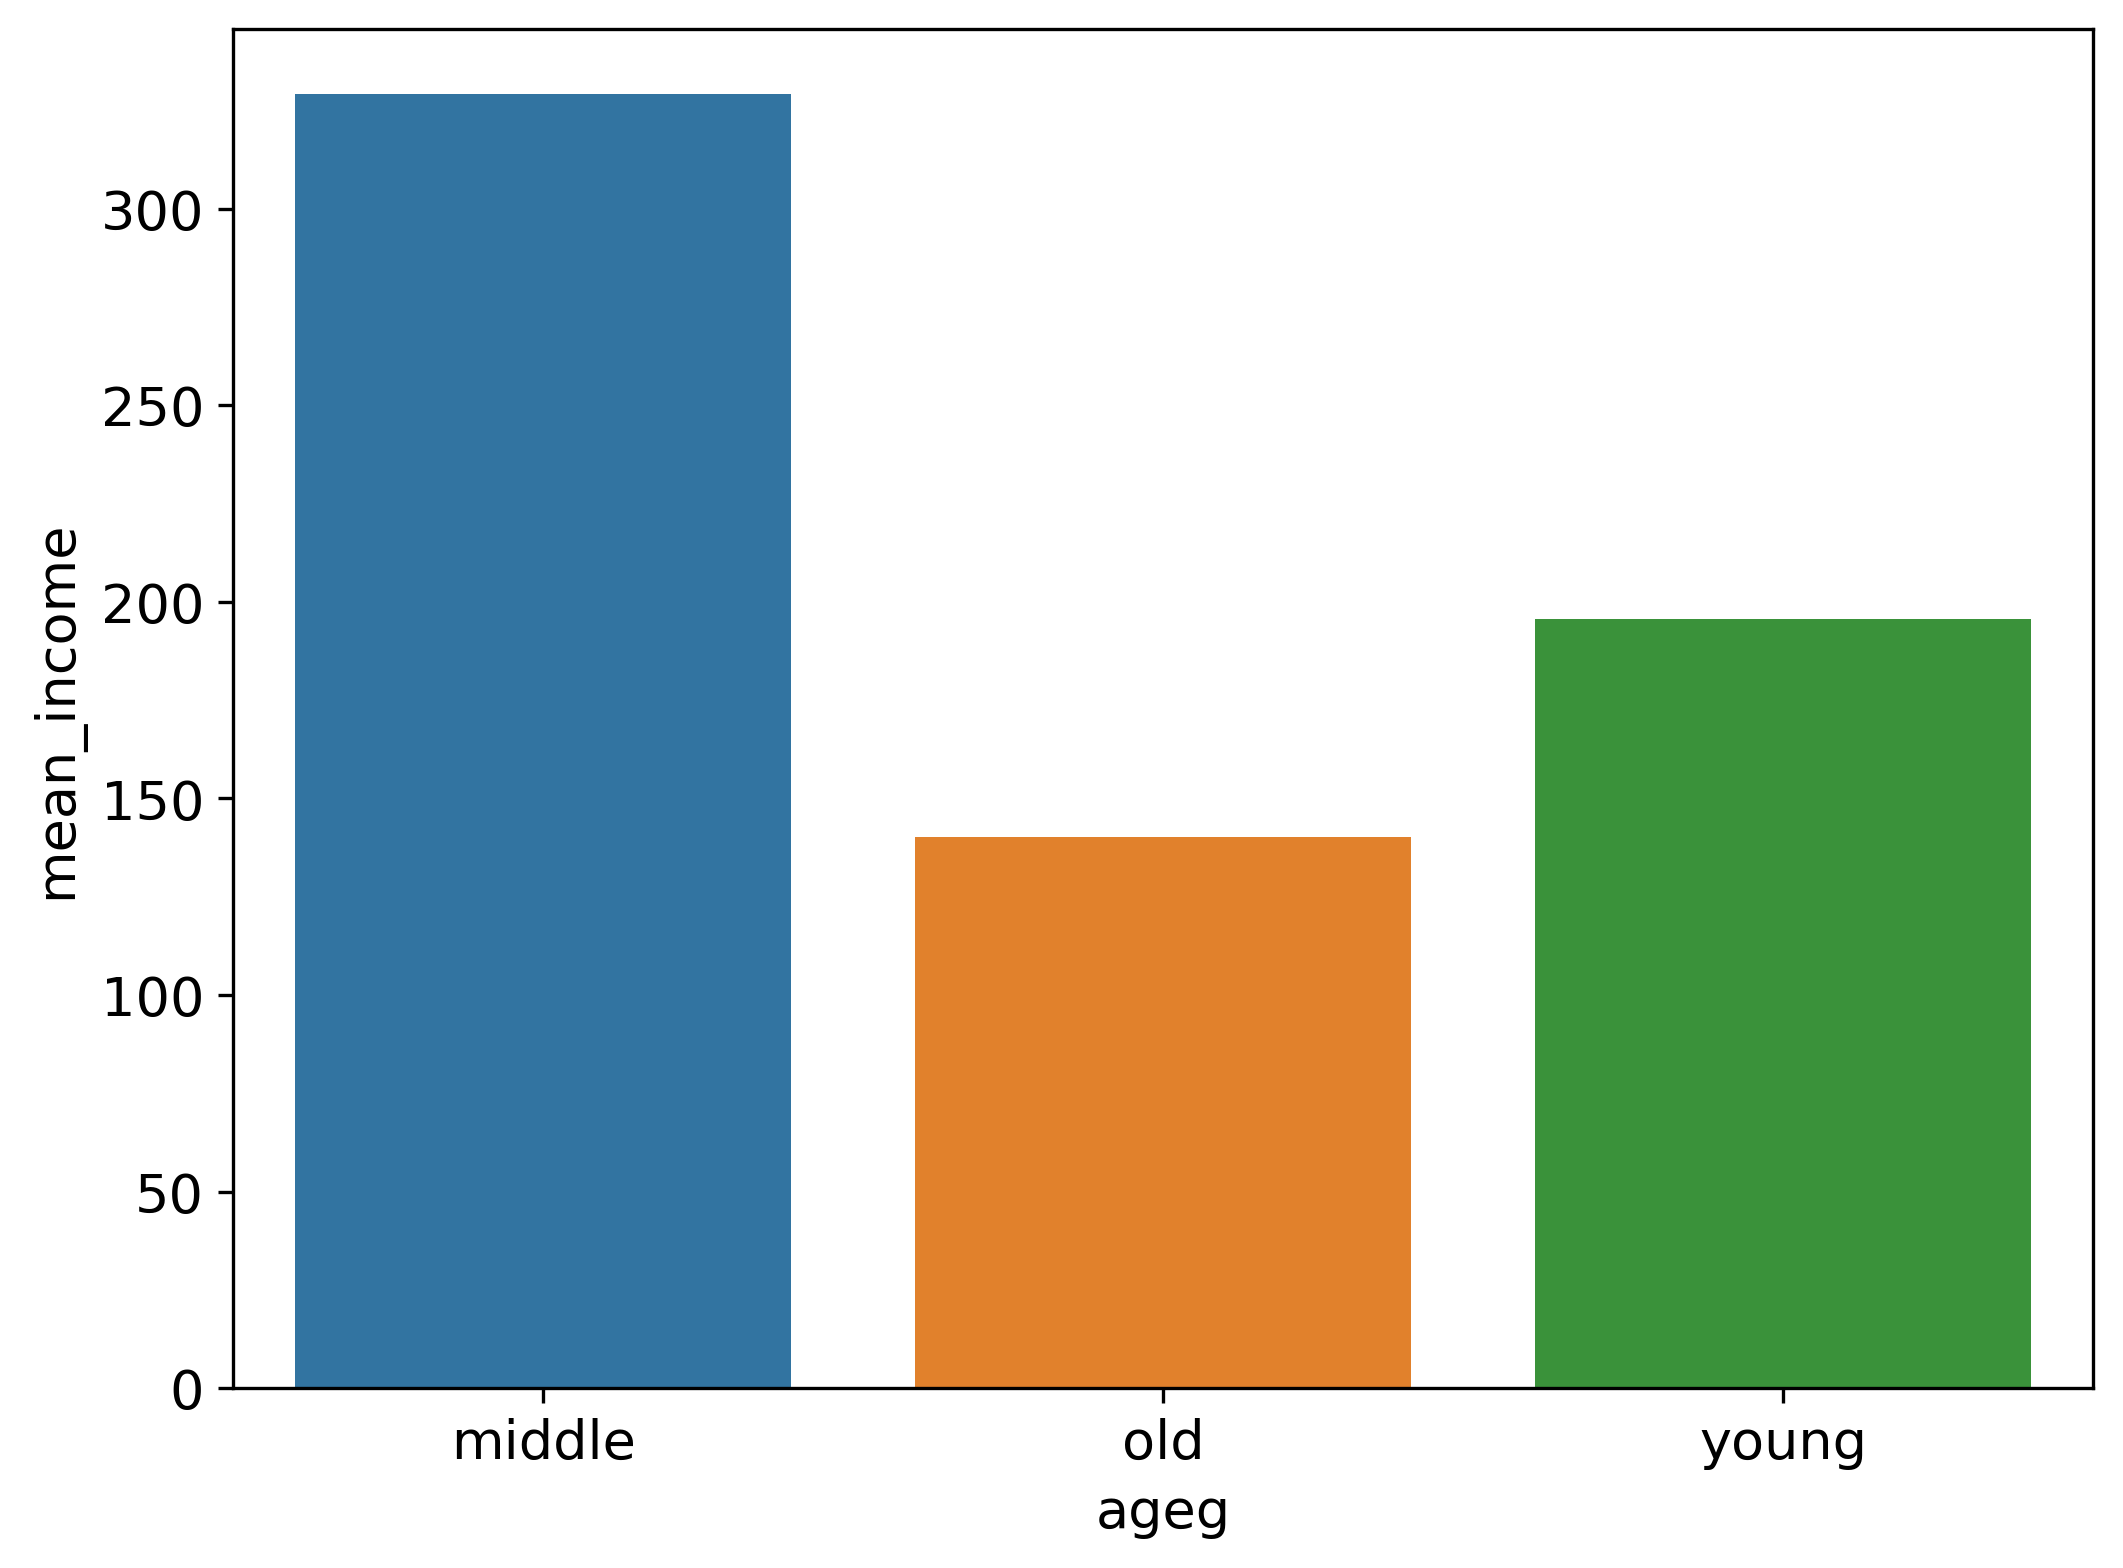

In [41]:
# bar plot
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income')

<AxesSubplot:xlabel='ageg', ylabel='mean_income'>

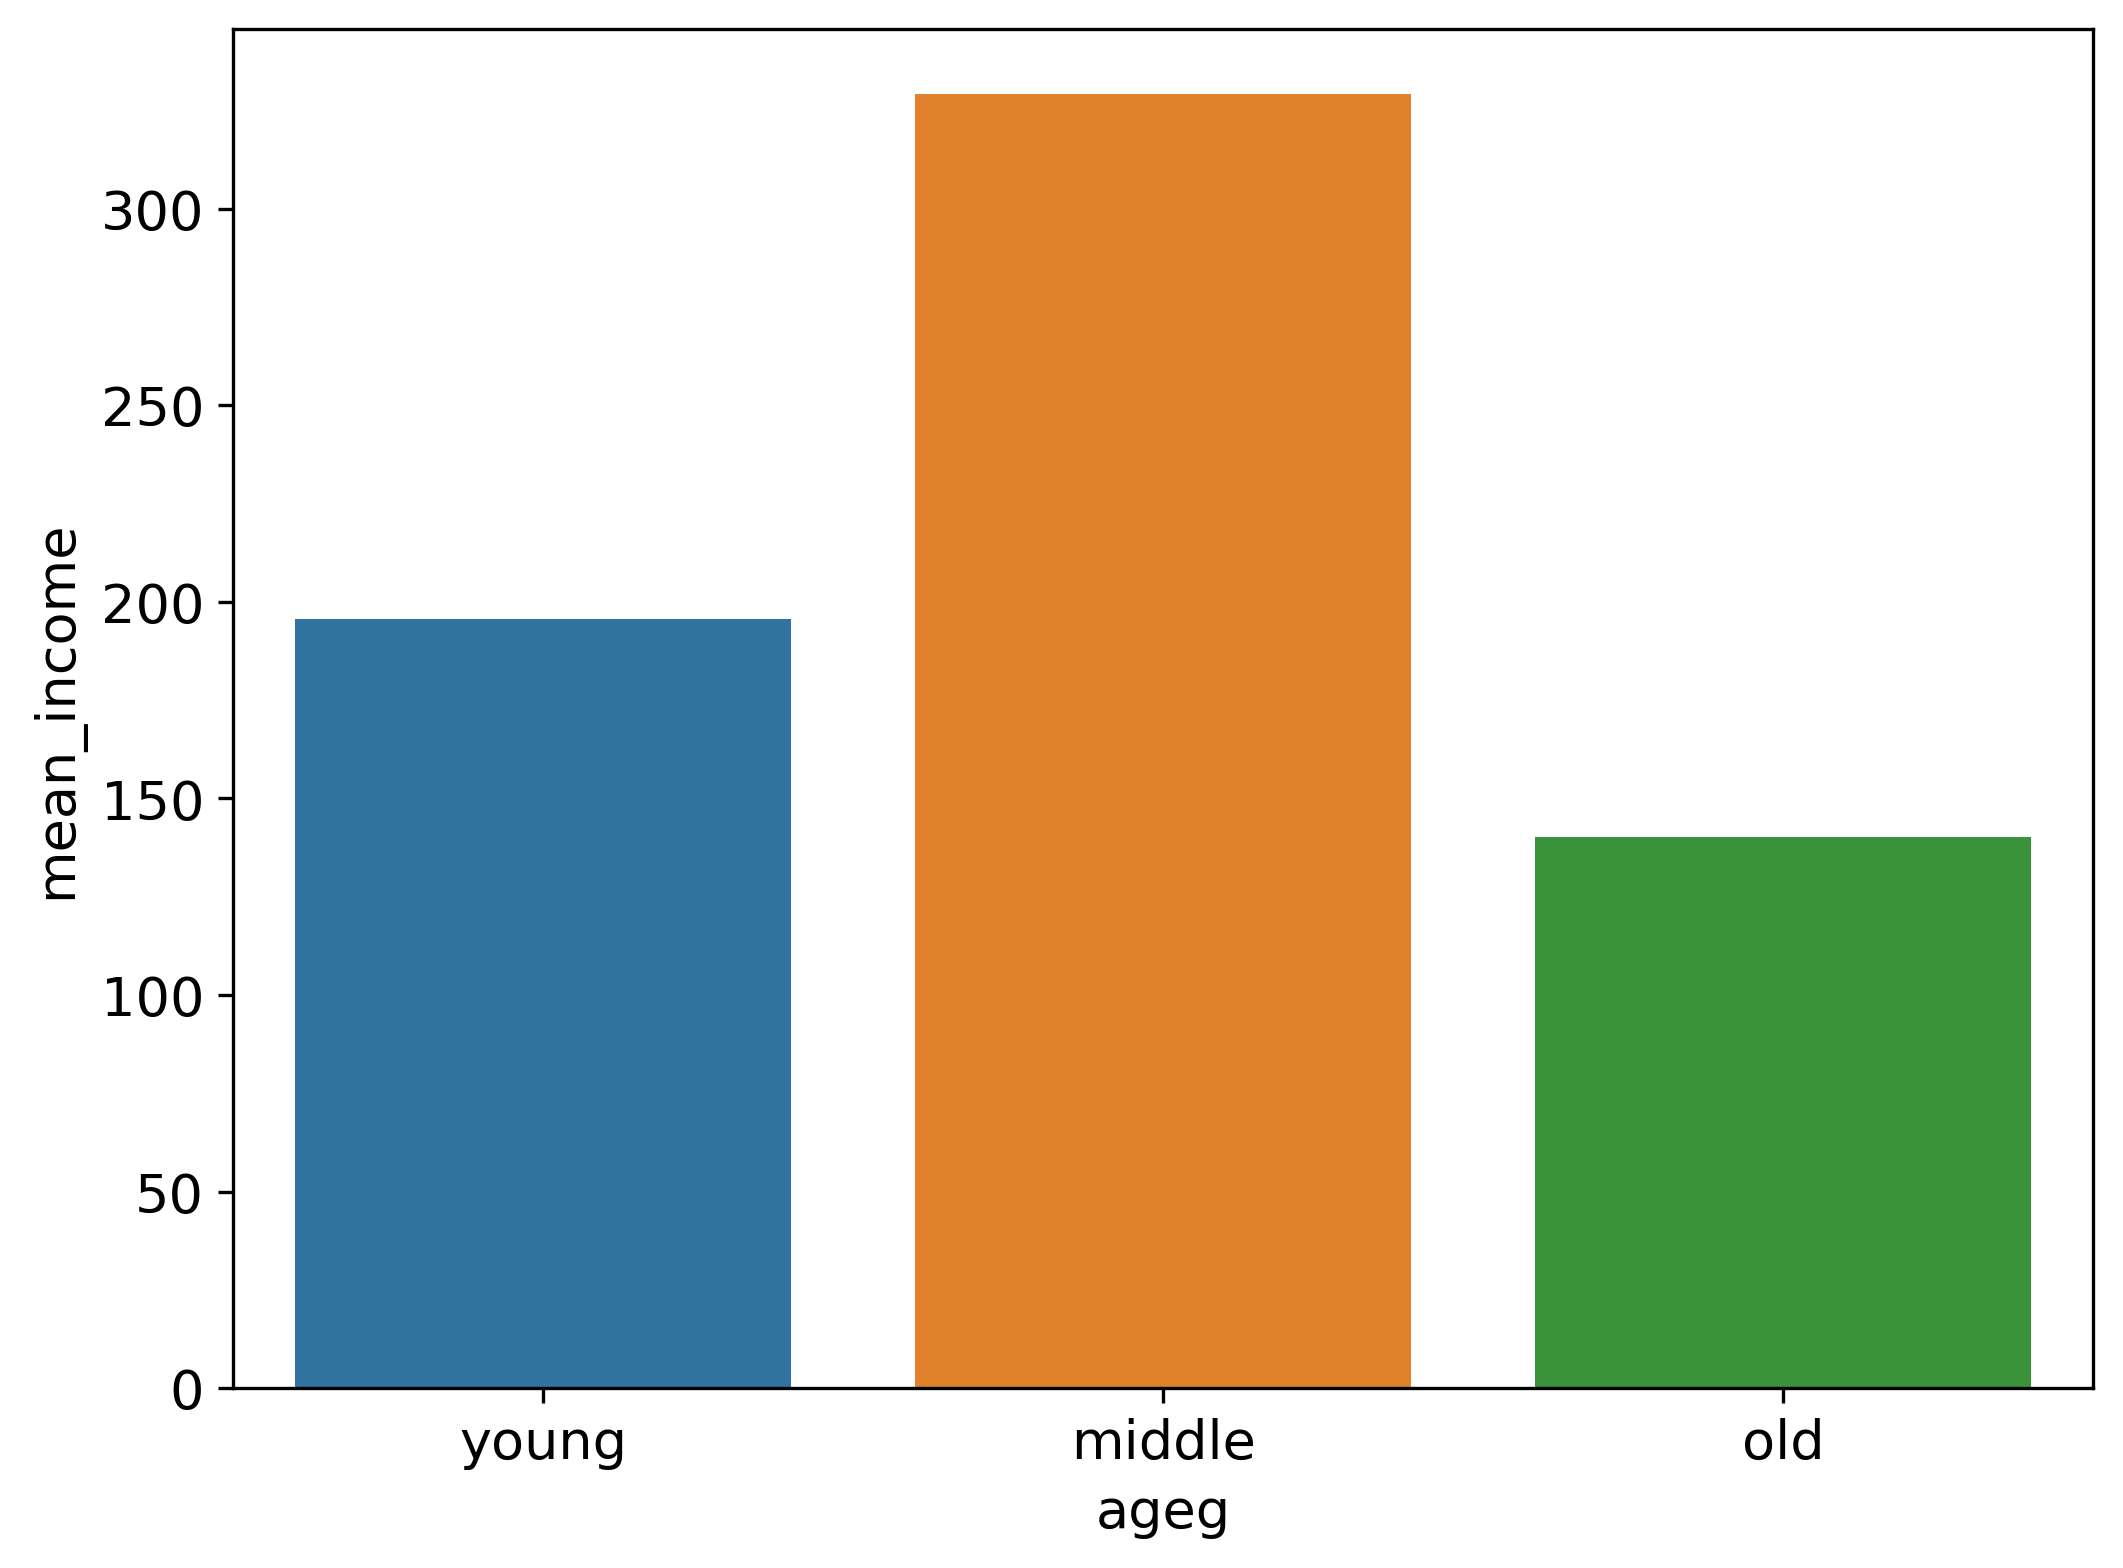

In [42]:
# sort plot
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income',
           order = ['young', 'middle', 'old'])

## 09-5 연령대 및 성별 월급 차이 - 성별 월급 차이는 연령대별로 다를까 ?

### 연령대 및 성별 월급 평균표 작성하기

#### 1. 연령대 및 성별 월급 평균표 만들기

In [43]:
# 연령대 및 성별 평균표 만들기
sex_income = \
welfare.dropna(subset = ['income']) \
.groupby('ageg', as_index = False) \
.agg(mean_income = ('income', 'mean'))

In [44]:
ageg_income

,ageg,mean_income
0,middle,329.157157
1,old,140.129003
2,young,195.663424


#### 2. 그래프 만들기

<AxesSubplot:xlabel='ageg', ylabel='mean_income'>

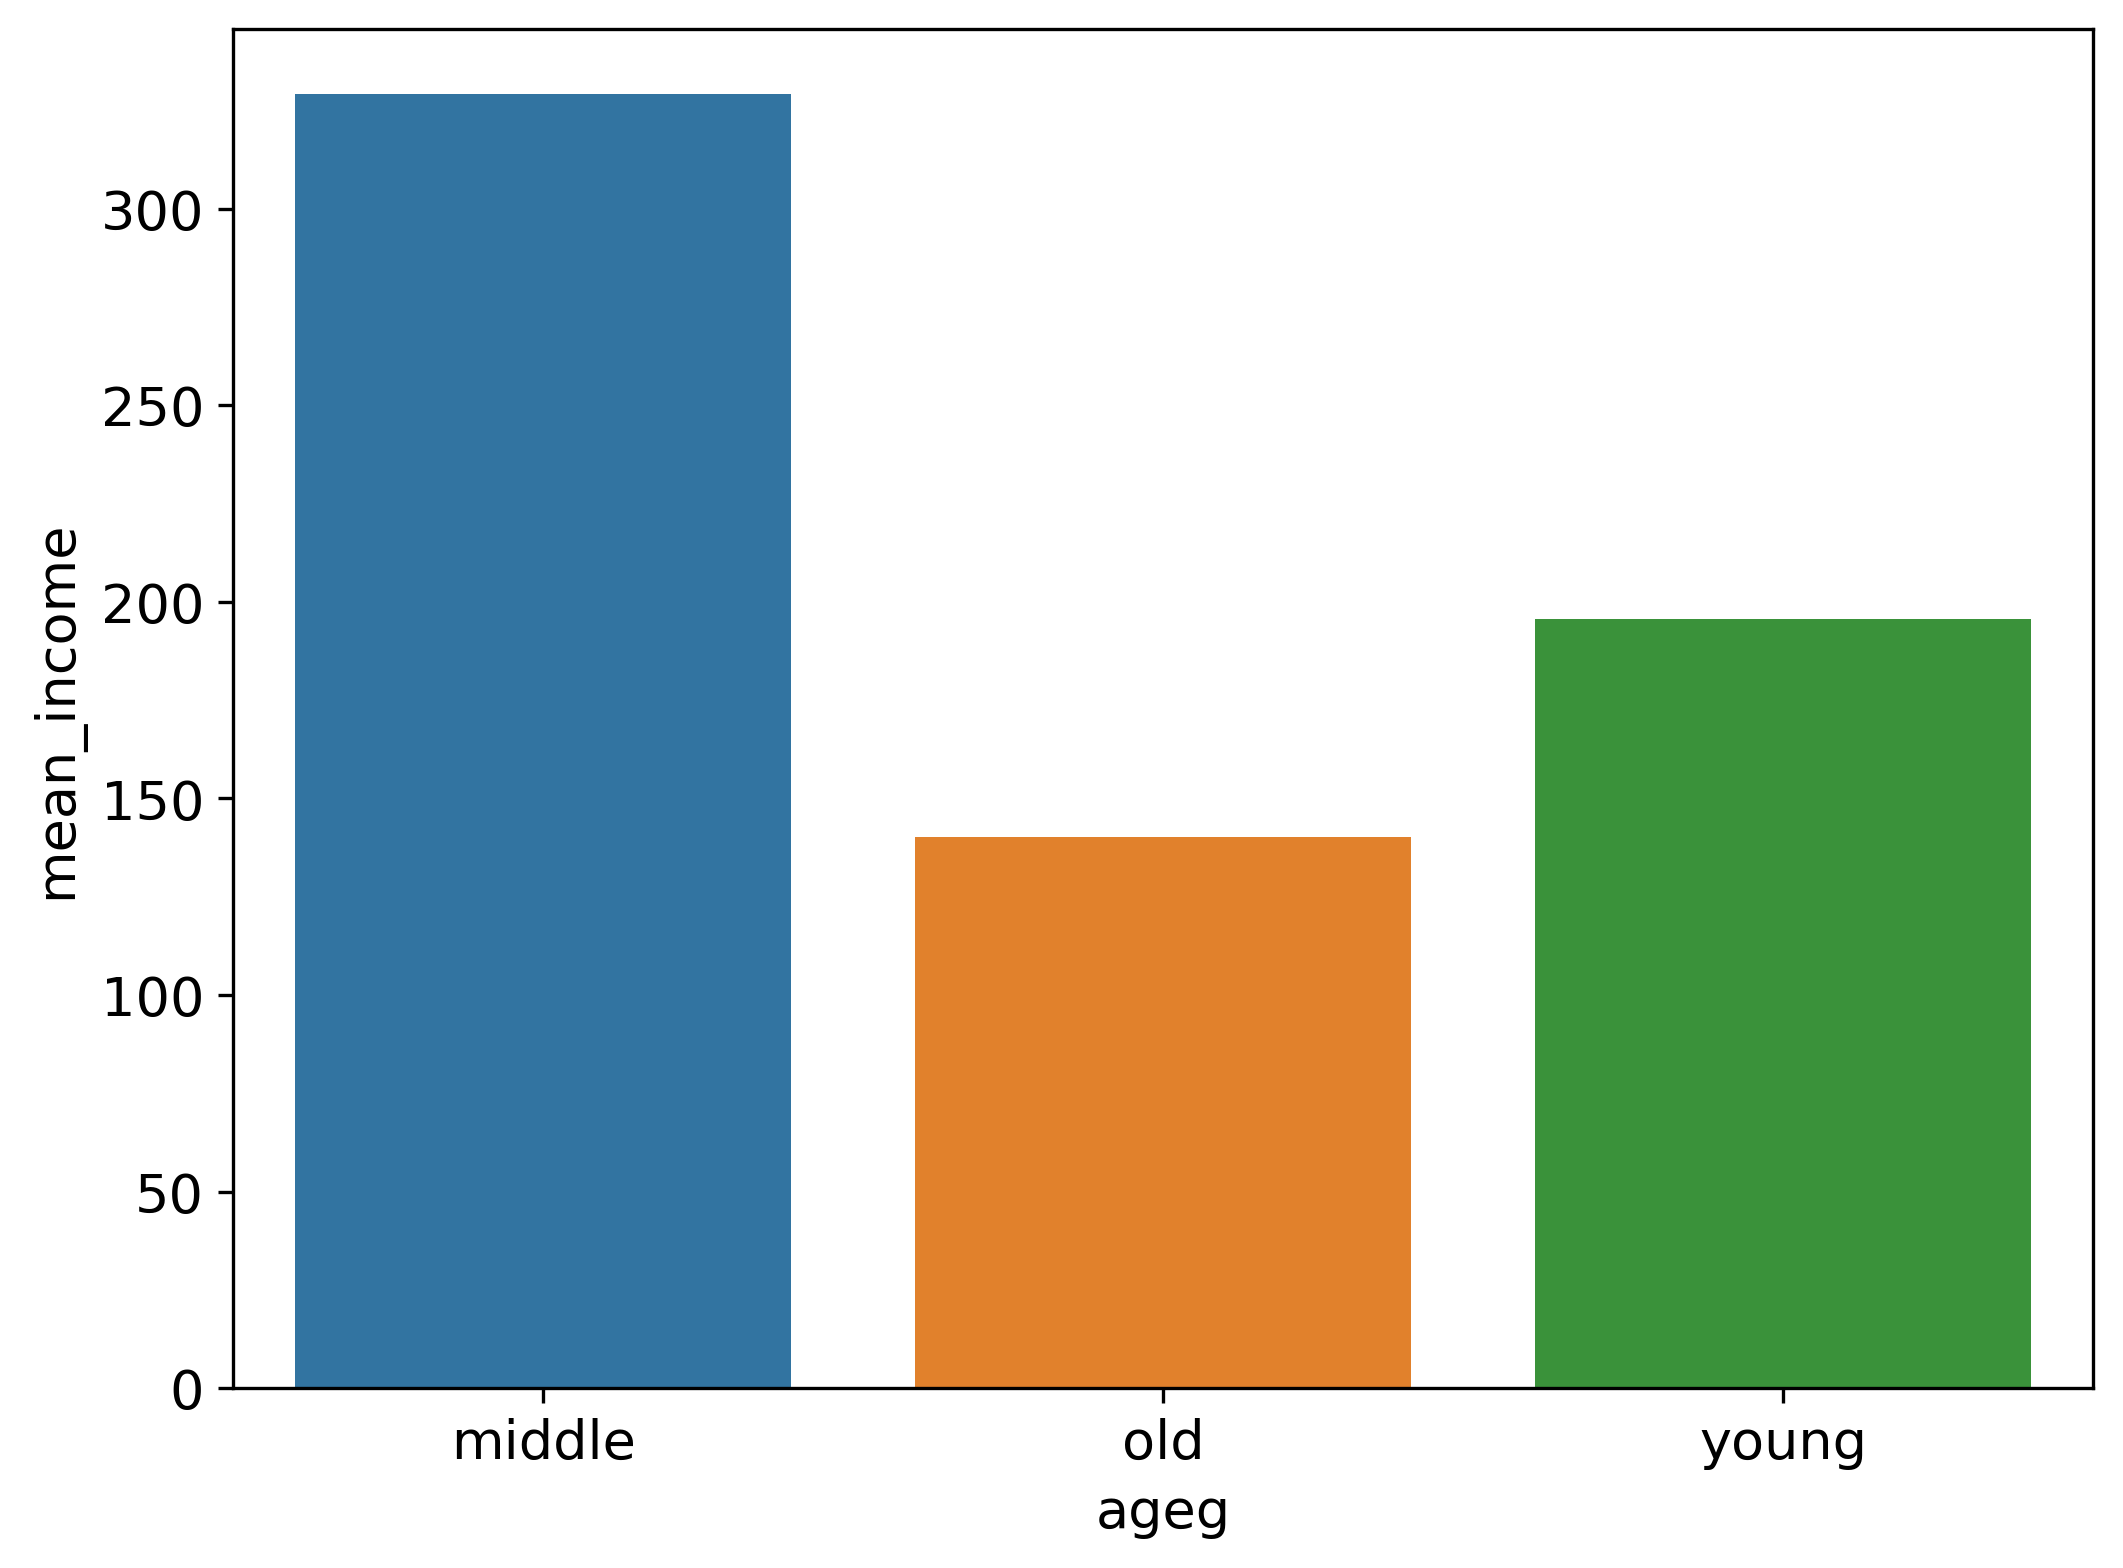

In [45]:
# barplot
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income')

<AxesSubplot:xlabel='ageg', ylabel='mean_income'>

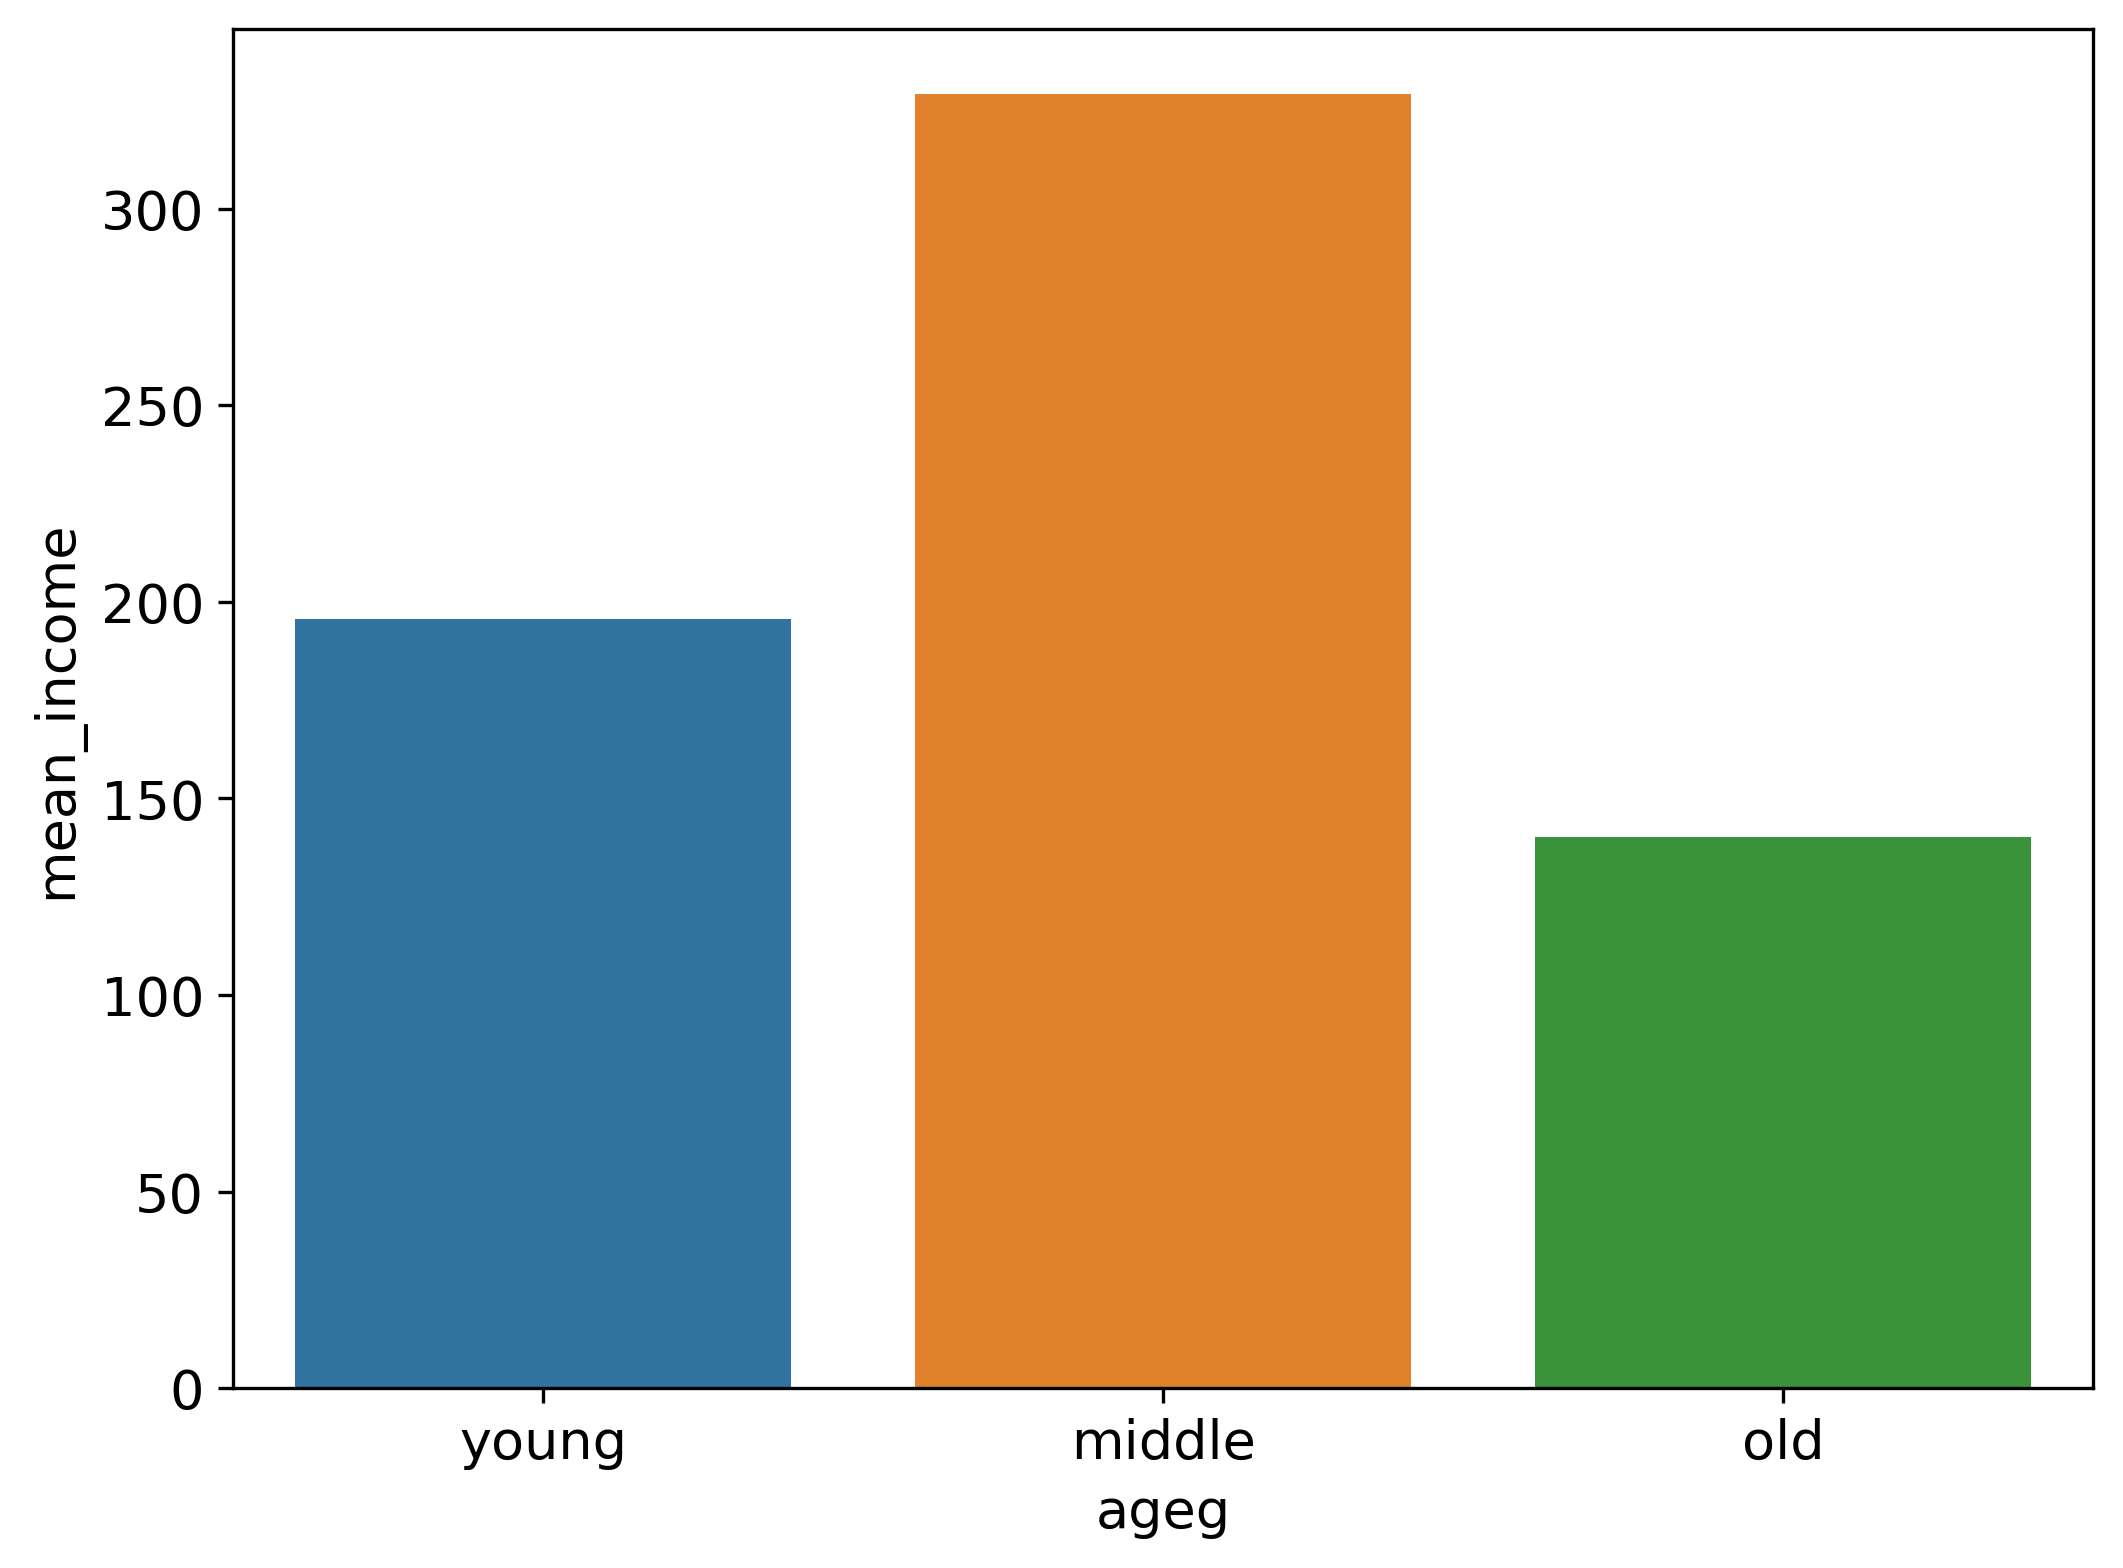

In [46]:
# sort bar
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income',
           order = ['young', 'middle', 'old'])

## 09-5 연령대 및 성별 월급 차이 - 성별 월급 차이는 연령대별로 다를까 ?

### 연령대 및 성별 월급 차이 분석하기

#### 1. 연령대 및 성별 월급 평균표 만들기

In [47]:
# 연령대 및 성별 월급 표 만들기
sex_income = \
welfare.dropna(subset = ['income']) \
.groupby(['ageg', 'sex'], as_index = False) \
.agg(mean_income = ('income', 'mean'))

In [48]:
sex_income

,ageg,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


#### 2. 그래프 만들기

<AxesSubplot:xlabel='ageg', ylabel='mean_income'>

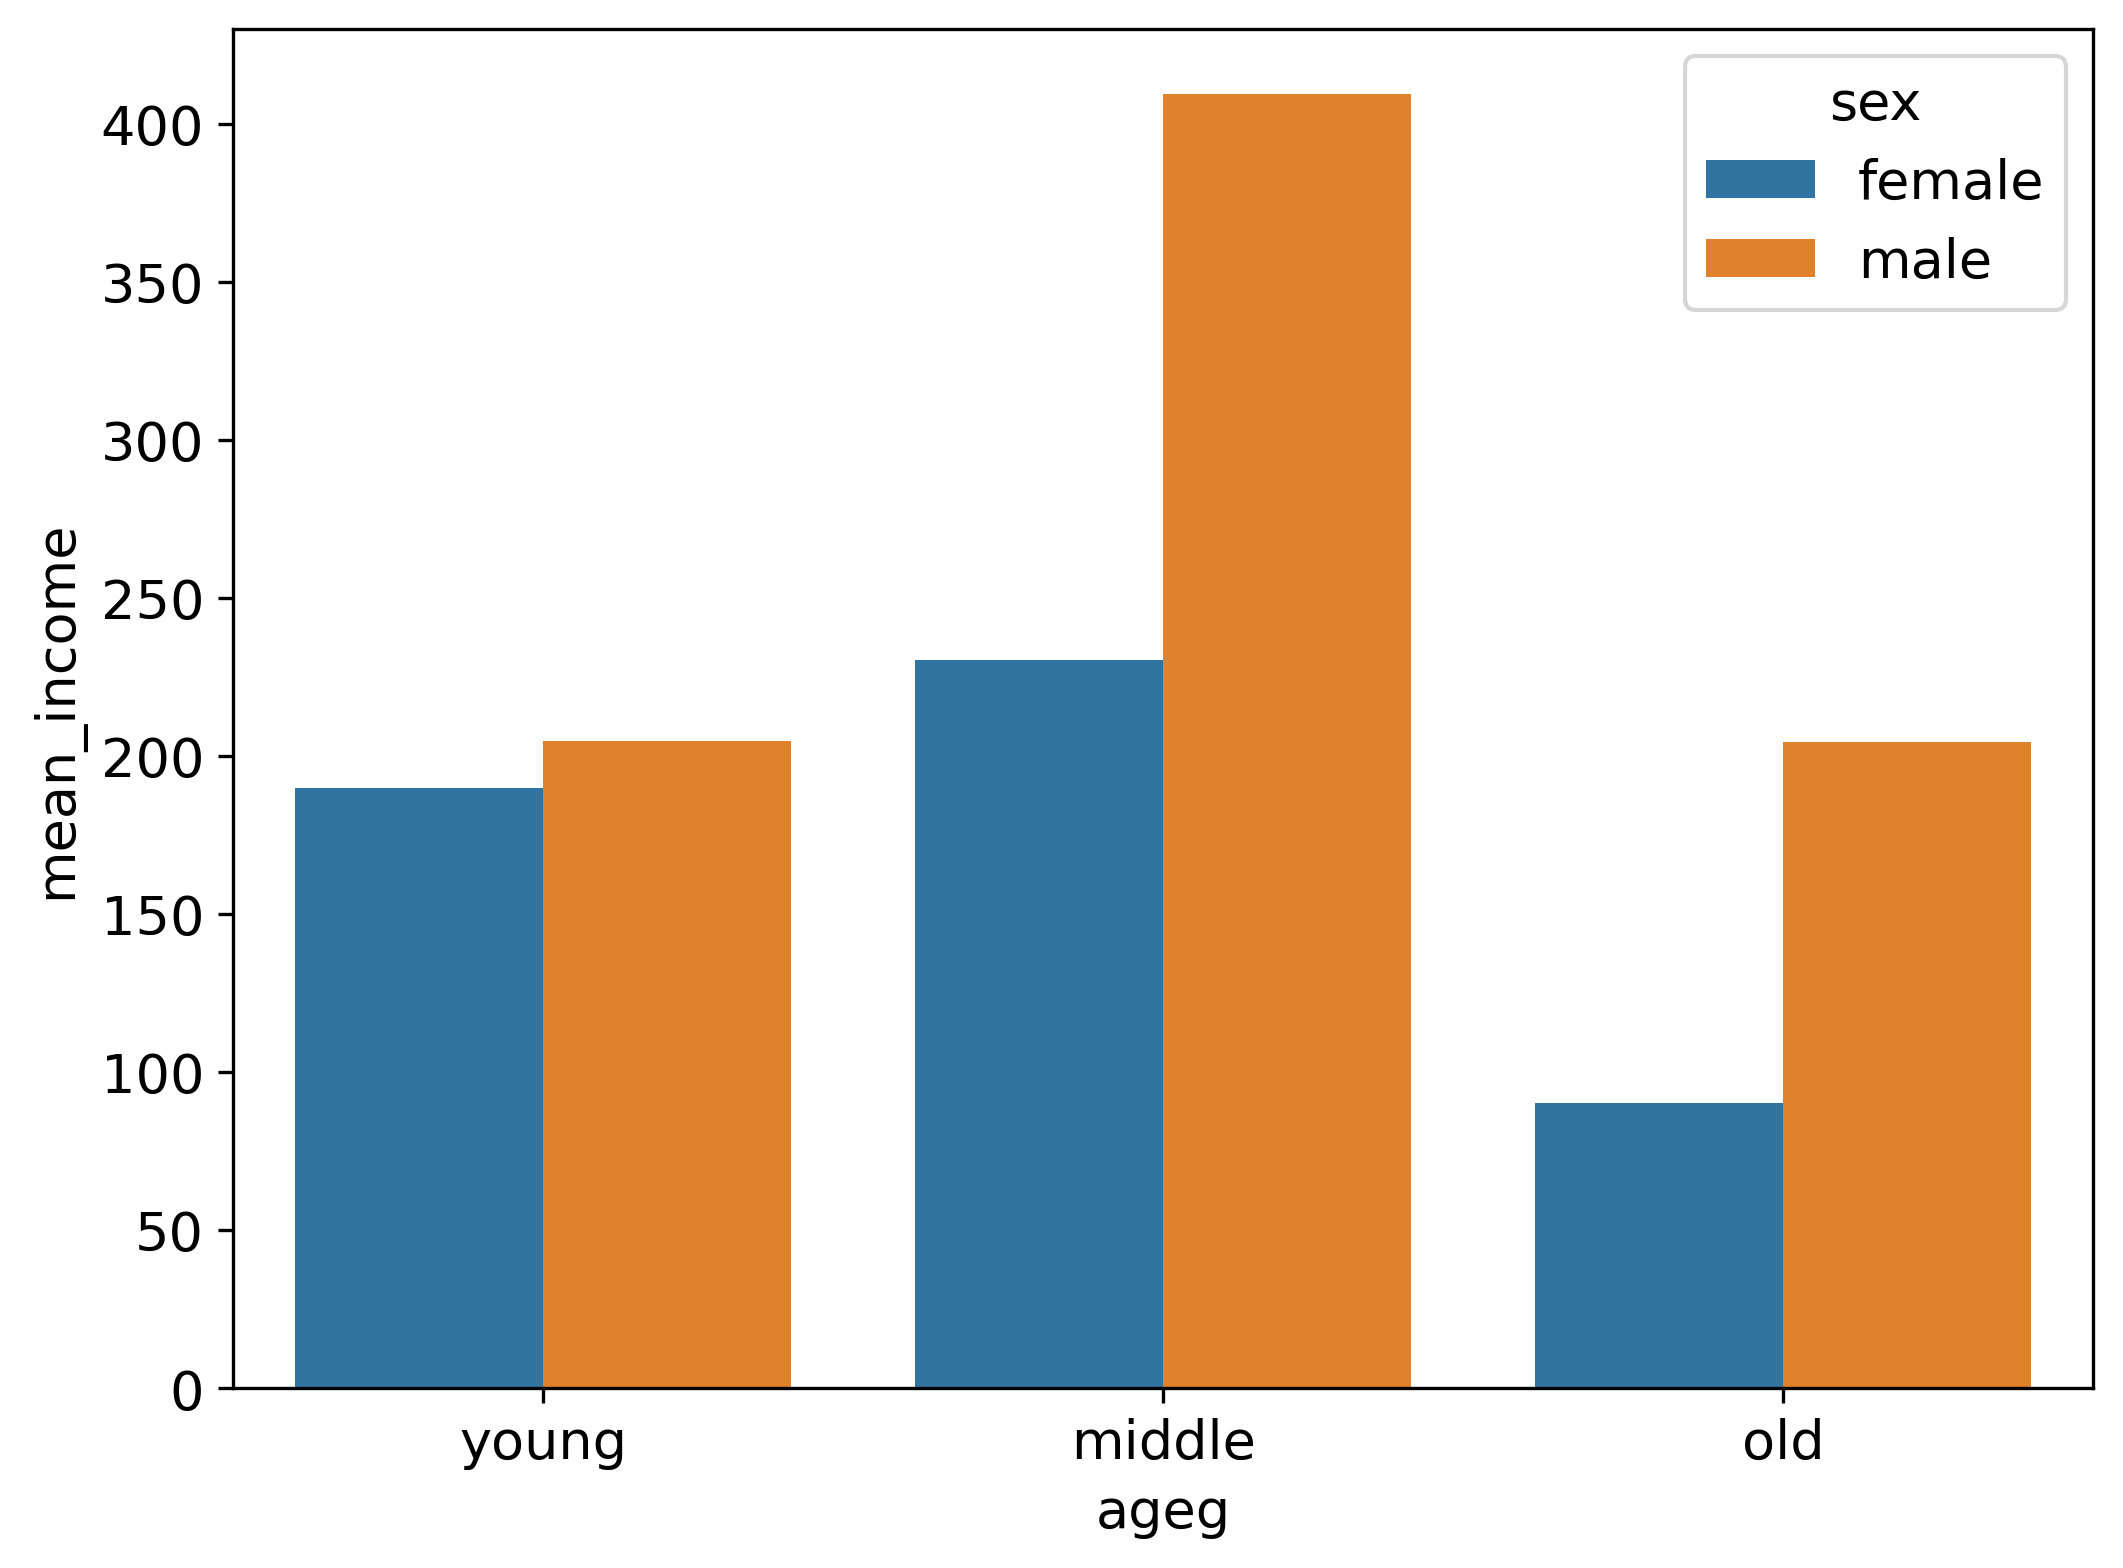

In [49]:
# barplot
sns.barplot(data = sex_income, x = 'ageg', y = 'mean_income', hue = 'sex',
           order = ['young', 'middle', 'old'])

### 나이 및 성별 월급 차이 분석하기

In [50]:
# 나이 및 성별 월급 평균표 만들기
sex_age = welfare.dropna(subset = ['income']) \
.groupby(['age', 'sex'], as_index = False) \
.agg(mean_income = ('income', 'mean'))

In [51]:
sex_age

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000
...,...,...,...
140,89.0,male,27.000000
141,90.0,female,27.000000
142,91.0,female,27.000000
143,91.0,male,13.000000


<AxesSubplot:xlabel='age', ylabel='mean_income'>

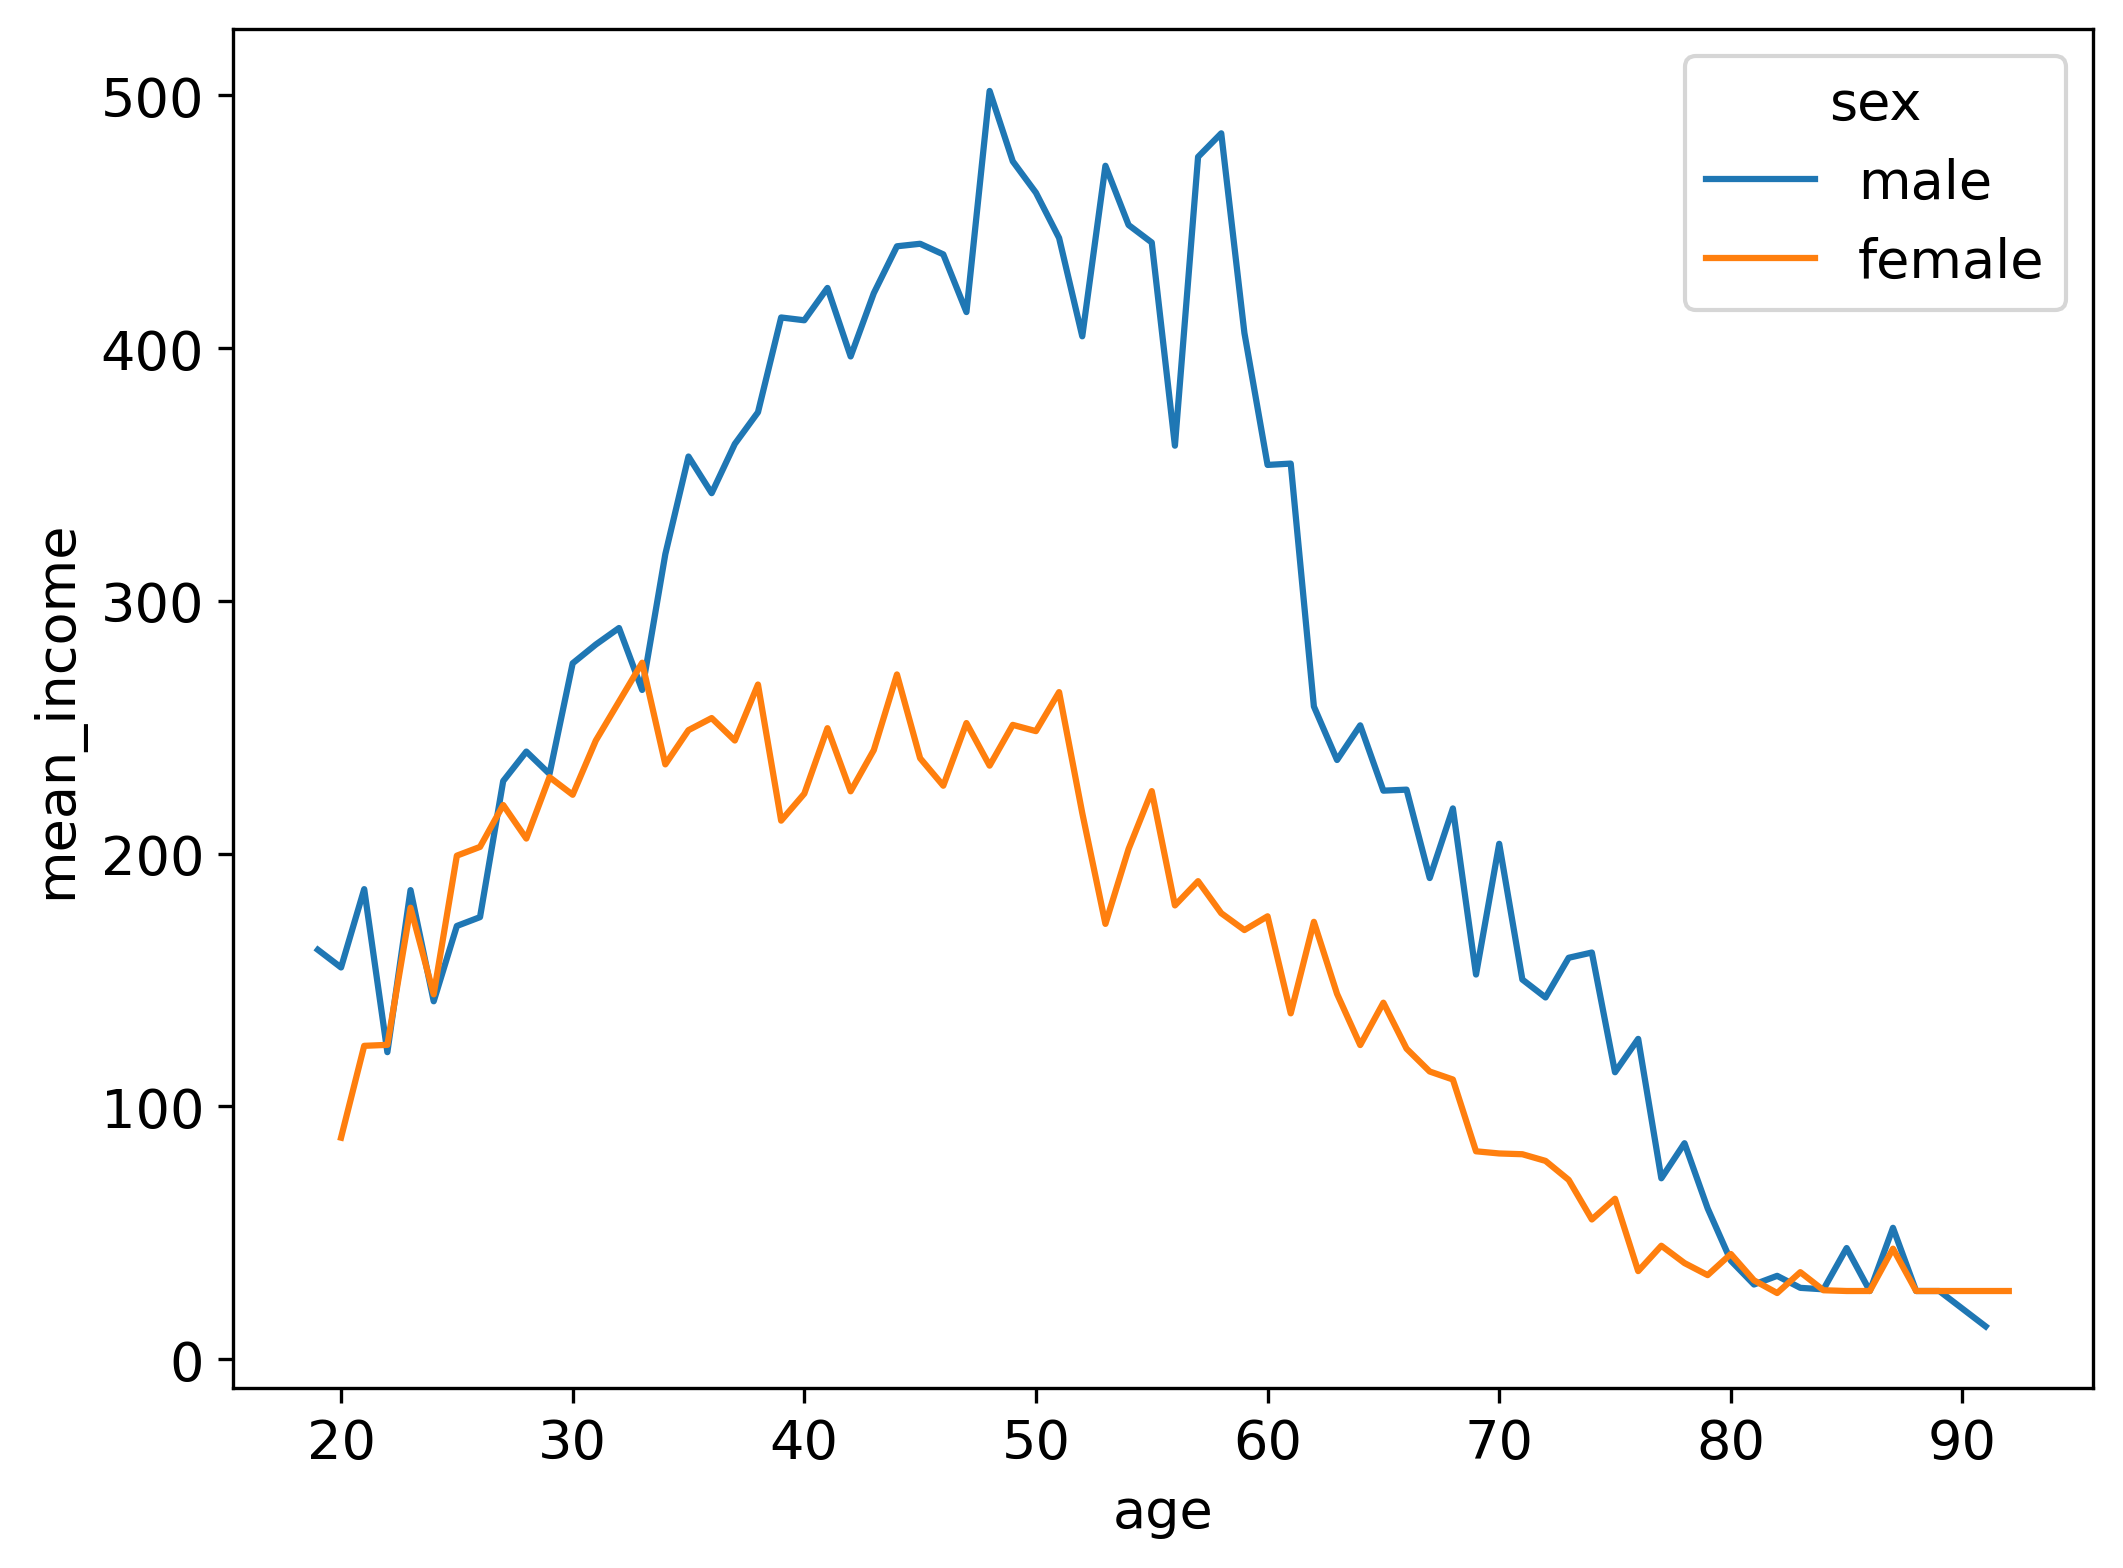

In [52]:
# line plot
sns.lineplot(data = sex_age, x = 'age',y = 'mean_income', hue = 'sex')

## 09-6 직업별 월급 차이 - 어떤직업이 월급을 가장 많이 받을까 ?

### 직업 변수 검토 및 전처리

#### 1. 변수 검토하기

In [53]:
welfare['code_job'].dtypes

dtype('float64')

In [54]:
welfare['code_job'].value_counts()

611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: code_job, Length: 150, dtype: int64

#### 2. 전처리하기

In [55]:
list_job = pd.read_excel('Koweps_Codebook_2019.xlsx', sheet_name = '직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [56]:
list_job

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자
...,...,...
151,992,계기∙자판기 및 주차 관리 종사자
152,999,기타 서비스 관련 단순 종사자
153,1001,장교
154,1002,부사관


In [57]:
list_job.shape

(156, 2)

In [58]:
# welfare에 list_job 결합하기
welfare = welfare.merge(list_job, how = 'left', on = 'code_job')

In [59]:
welfare

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5,age,ageg,job
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,75.0,old,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,72.0,old,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,NaN,NaN,1284.0,NaN,0.0,NaN,78.0,old,전기공
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN,58.0,middle,금속기계 부품 조립원
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,5.0,2.0,NaN,NaN,NaN,0.0,NaN,57.0,middle,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,53.0,middle,NaN
14414,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,28.0,young,NaN
14415,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,208.0,NaN,0.0,NaN,25.0,young,건설 및 광업 단순 종사자
14416,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,NaN,1200.0,NaN,0.0,NaN,22.0,young,보건 의료 관련 종사자


### 직업별 월급 차이 분석하기

#### 1. 직업별 월급 평균표 만들기

In [60]:
# code_job 결측치 제거 후 code_job, job 출력
job_income = welfare.dropna(subset = ['job', 'income']) \
.groupby('job', as_index = False) \
.agg(mean_income = ('income', 'mean'))

job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000


#### 3. 그래프 만들기

#### (1) 월급이 많은 직업

In [61]:
# 상위 10위 노출
top10 = job_income.sort_values('mean_income', ascending = False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


In [62]:
# 맑음 고딕 폰트 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'AppleGothic'})

<AxesSubplot:xlabel='mean_income', ylabel='job'>

/Users/seohuiwon/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


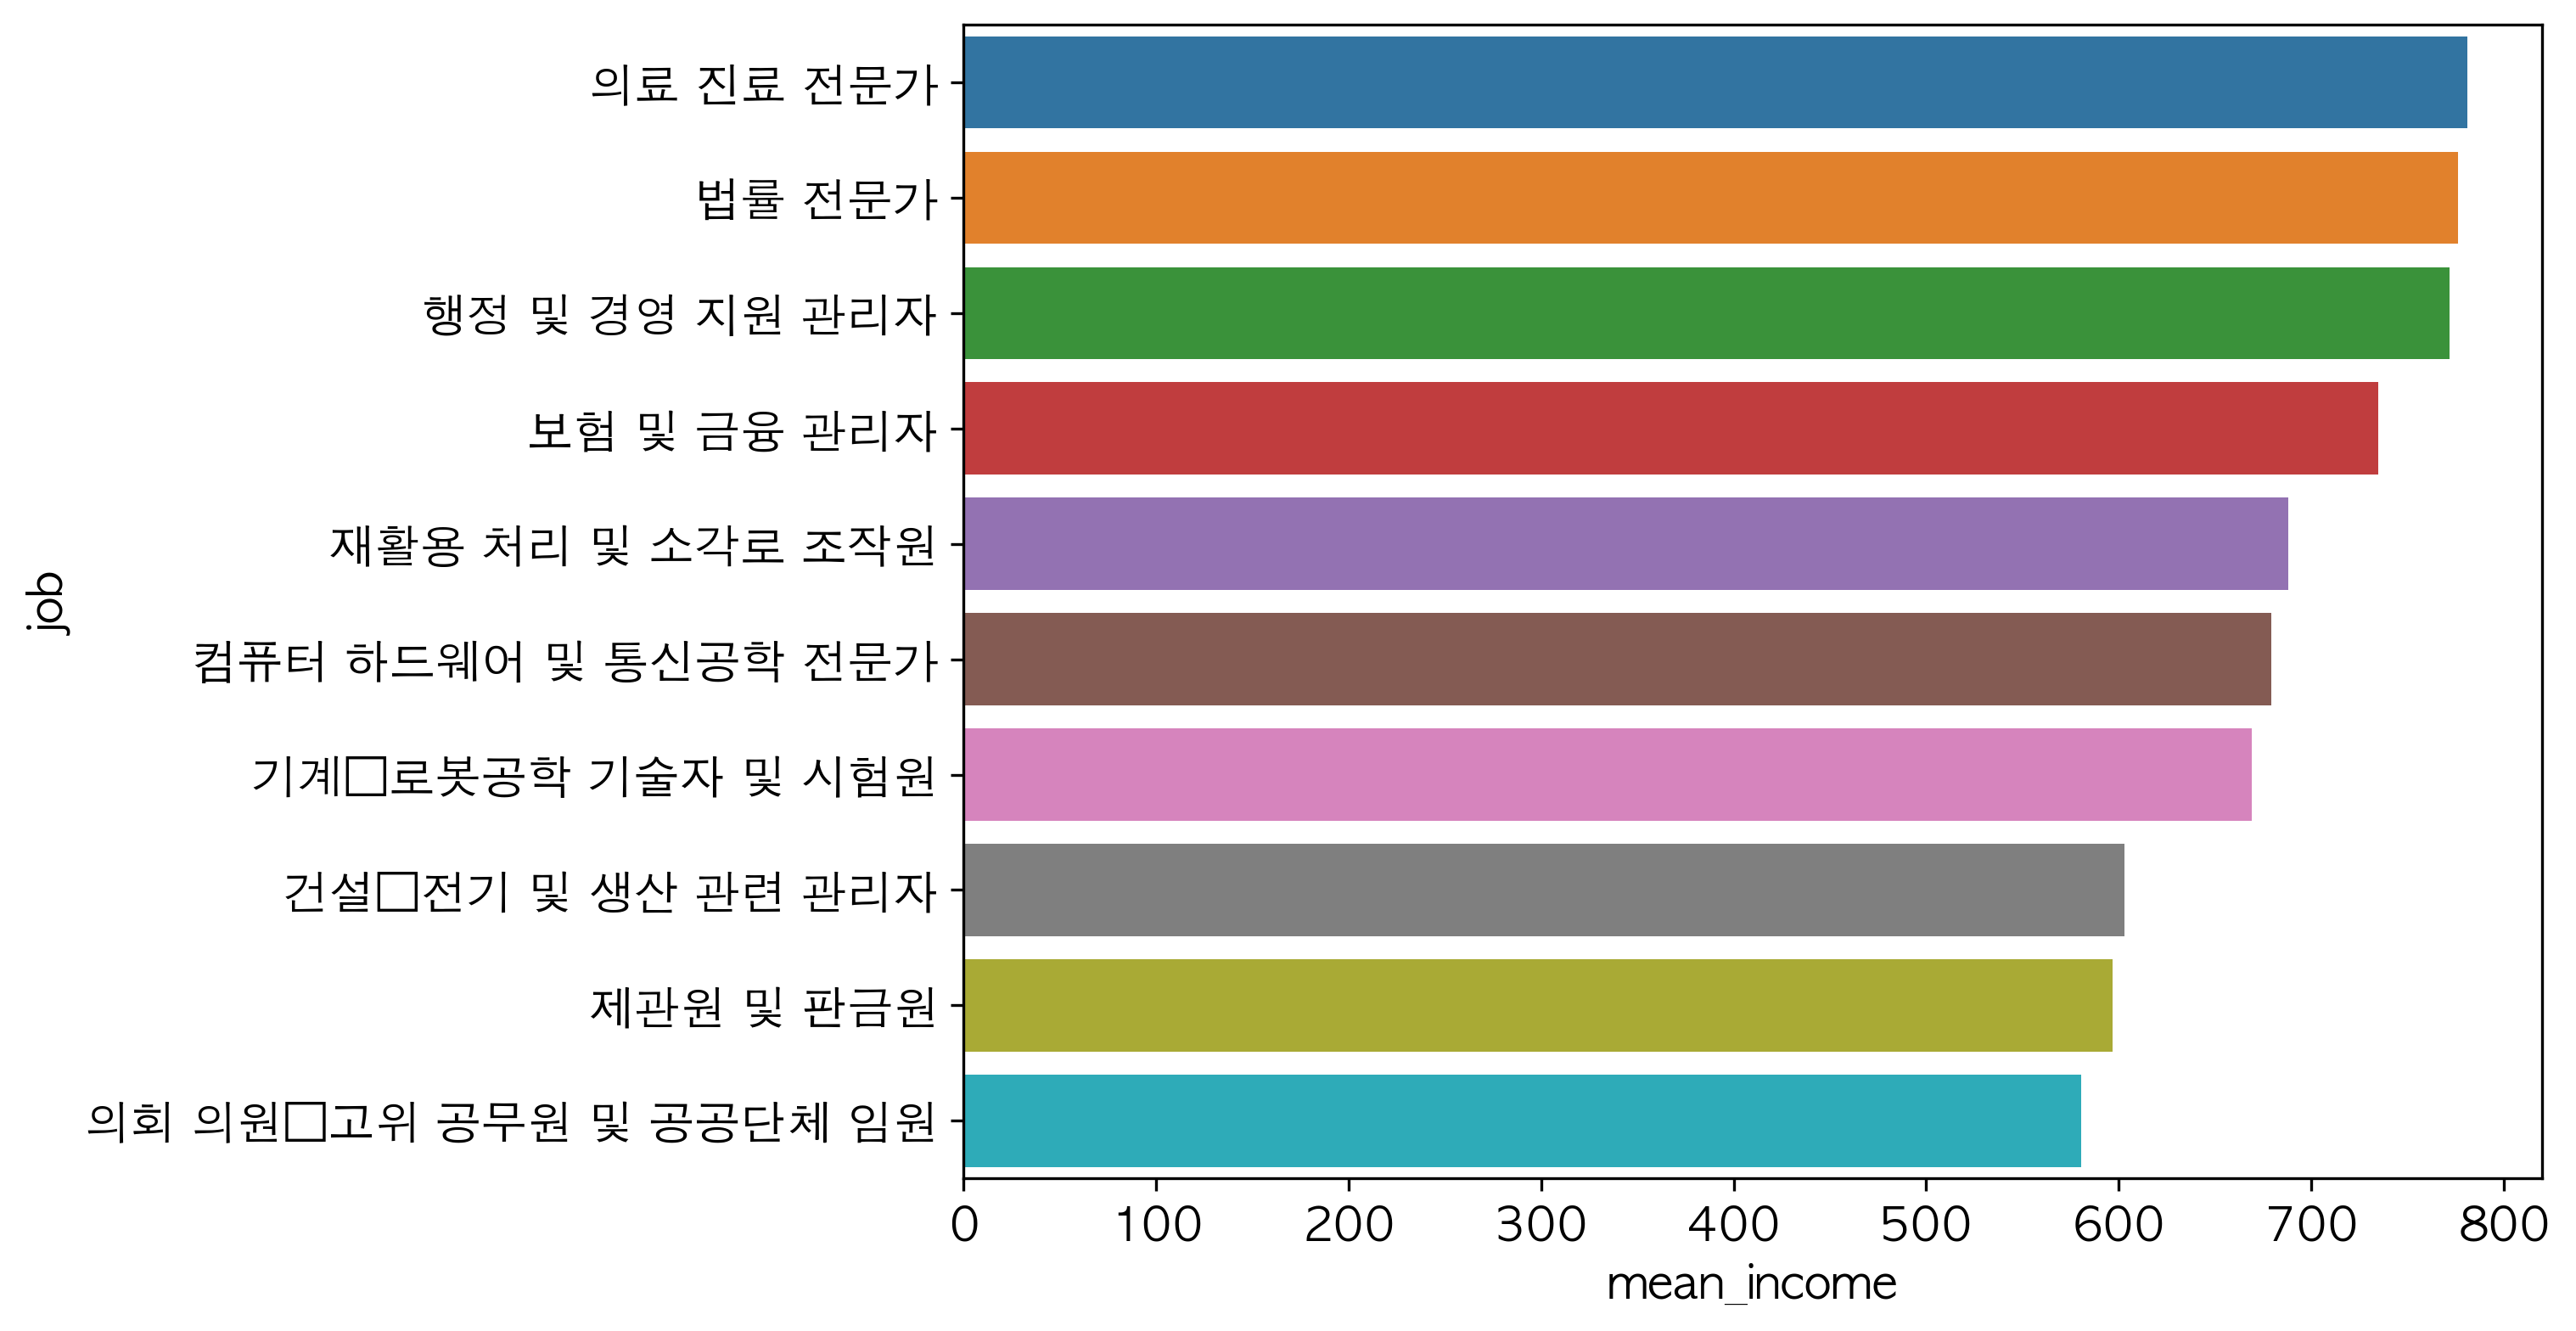

In [63]:
# barplot
sns.barplot(data = top10, y = 'job', x = 'mean_income')

#### (2) 월급이 적은 직업

In [64]:
### 하위 10위 추출
bottom10 = job_income.sort_values('mean_income').head(10)

In [65]:
bottom10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
139,학예사∙사서 및 기록물 관리사,140.000000
126,채굴 및 토목 관련 기능 종사자,140.000000
135,판매 관련 단순 종사자,140.909091


[(0.0, 800.0)]

/Users/seohuiwon/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


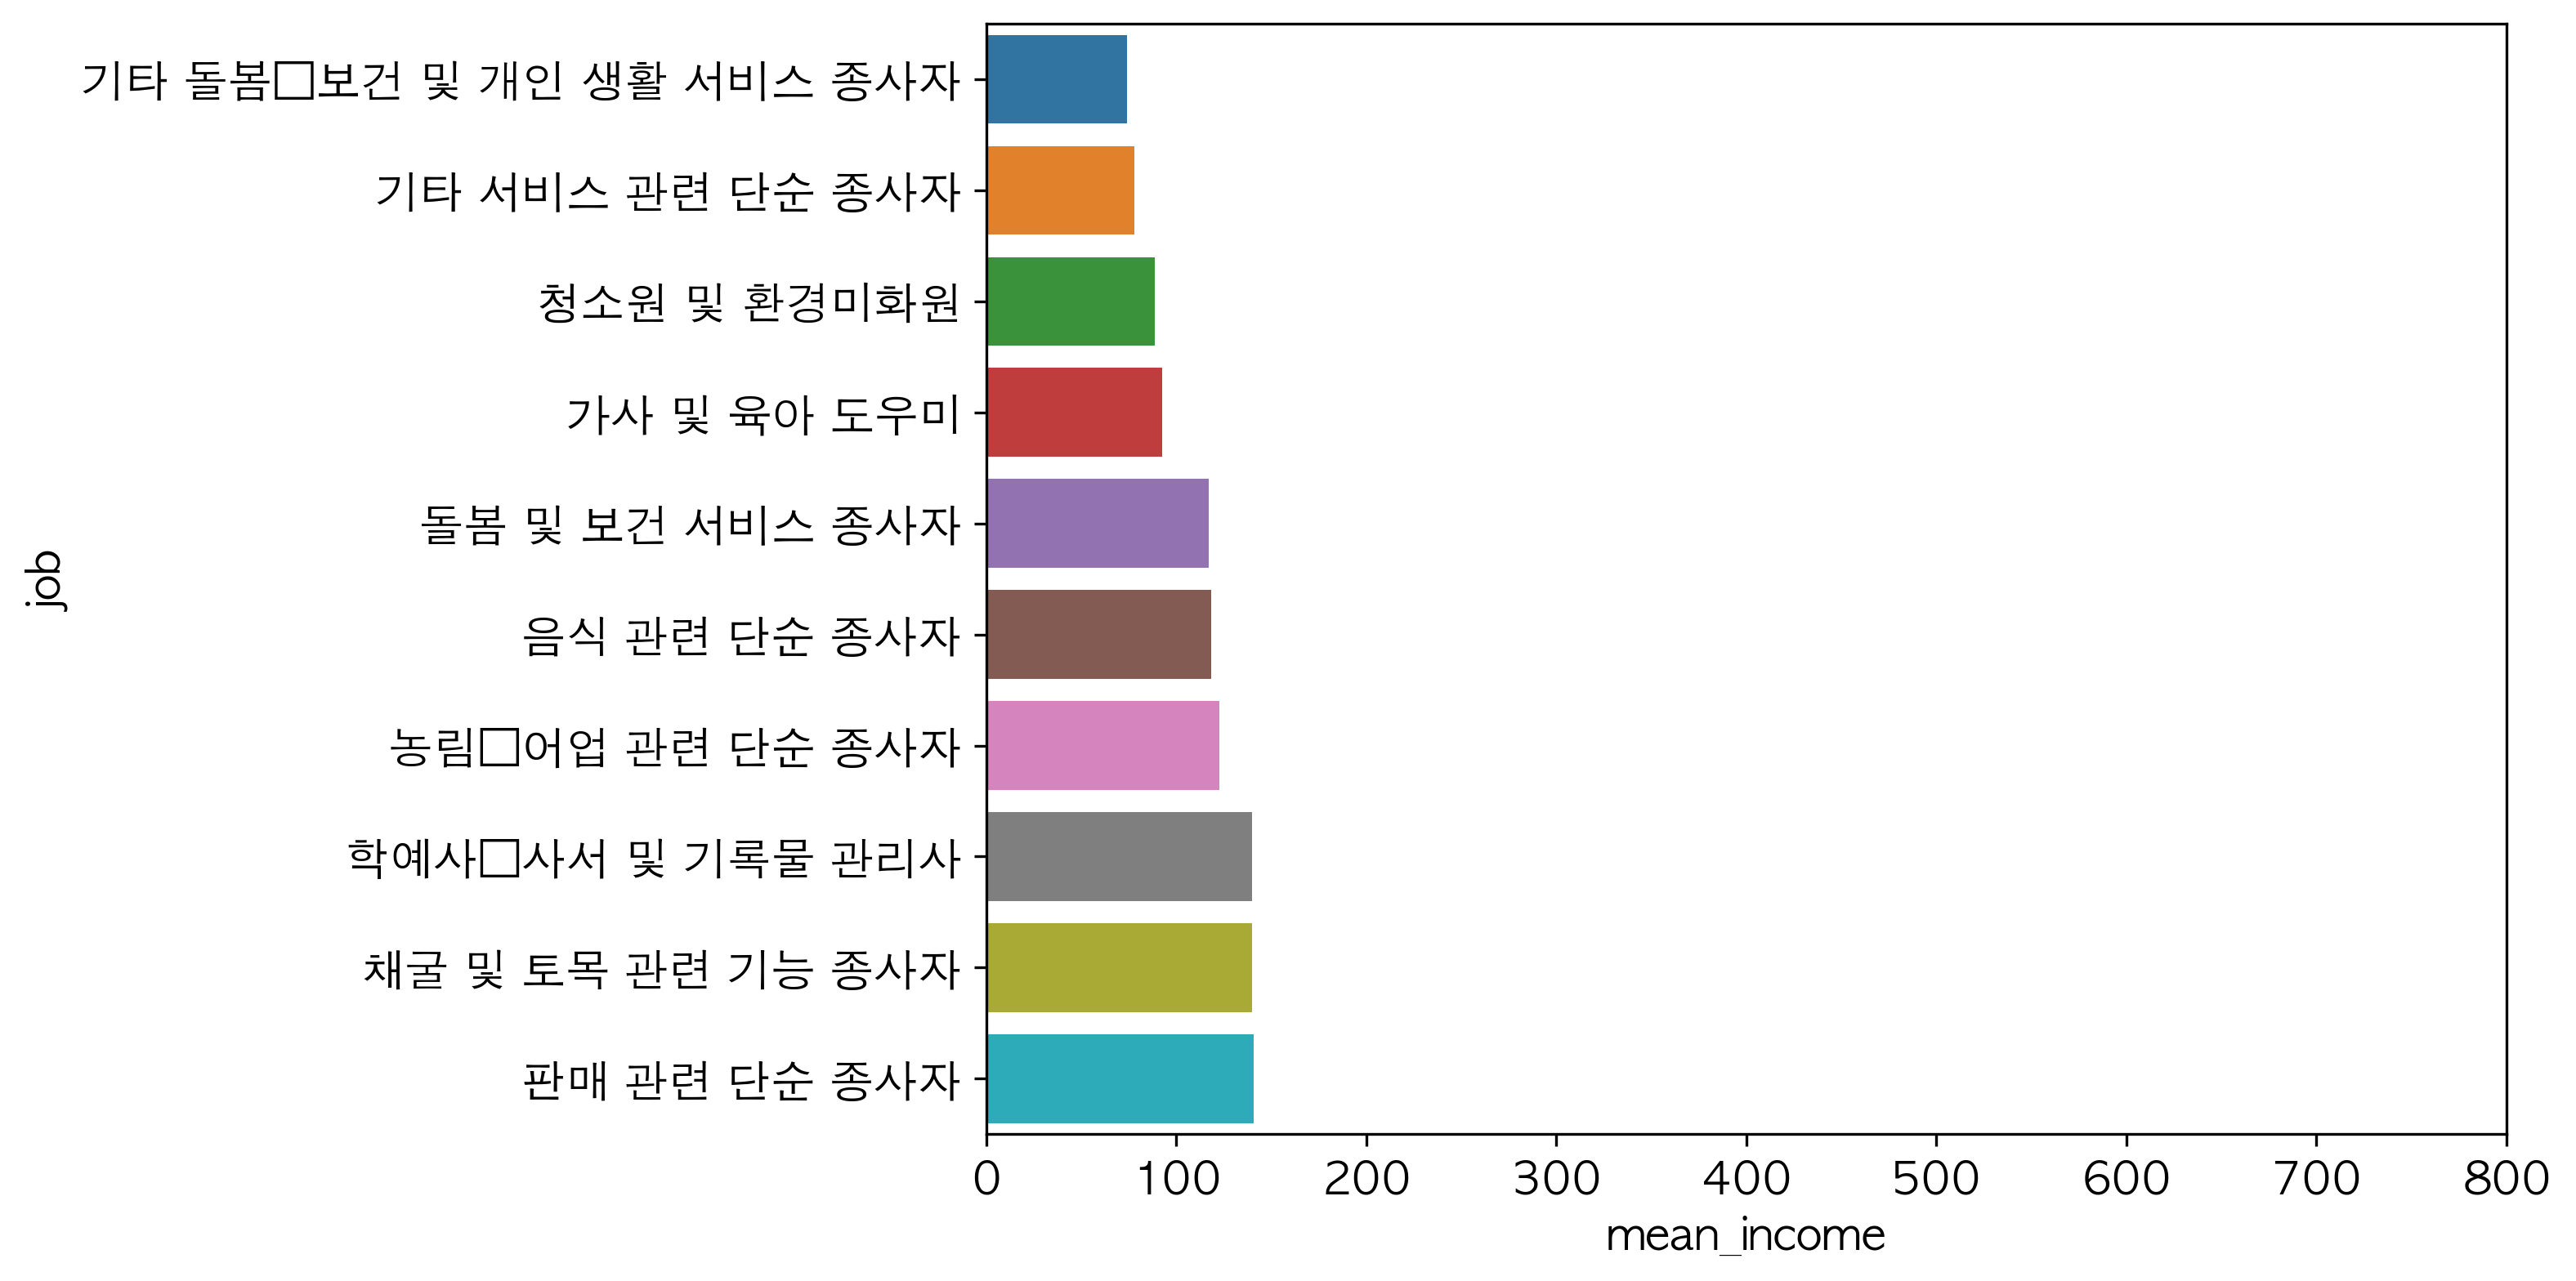

In [66]:
# bar plot
sns.barplot(data = bottom10, y = 'job', x = 'mean_income')\
.set(xlim = (0, 800))

## 09-7 성별 직업 빈도 - 성별로 어떤 직업이제일 많을까?

### 성별 직업 빈도 분석하기

#### 1. 성별 직업 빈도표 만들기

In [67]:
# 남성 직업 빈도 상위 10
# job 결측치 제거
# male 추출
# job별 분리
# job 빈도 구하기
# 내림차순 정렬
# 상위 10행 추출
job_male = welfare.dropna(subset = ['job']) \
                  .query('sex == "male"') \
                  .groupby('job', as_index = False) \
                  .agg(n = ('job', 'count')) \
                  .sort_values('n', ascending = False) \
                  .head(10)
job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [68]:
## 여성 직업 빈도 상위 10개 추출

# job 결측치 제거
# female 추출
# job별 분리
# job 빈도 구하기
# 내림차순 정렬
# 상위 10행 추출
job_female = welfare.dropna(subset = ['job']) \
                    .query('sex == "female"') \
                    .groupby('job', as_index = False) \
                    .agg(n = ('job', 'count')) \
                    .sort_values('n', ascending = False) \
                    .head(10)
job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


#### 2. 그래프 만들기

[(0.0, 800.0)]

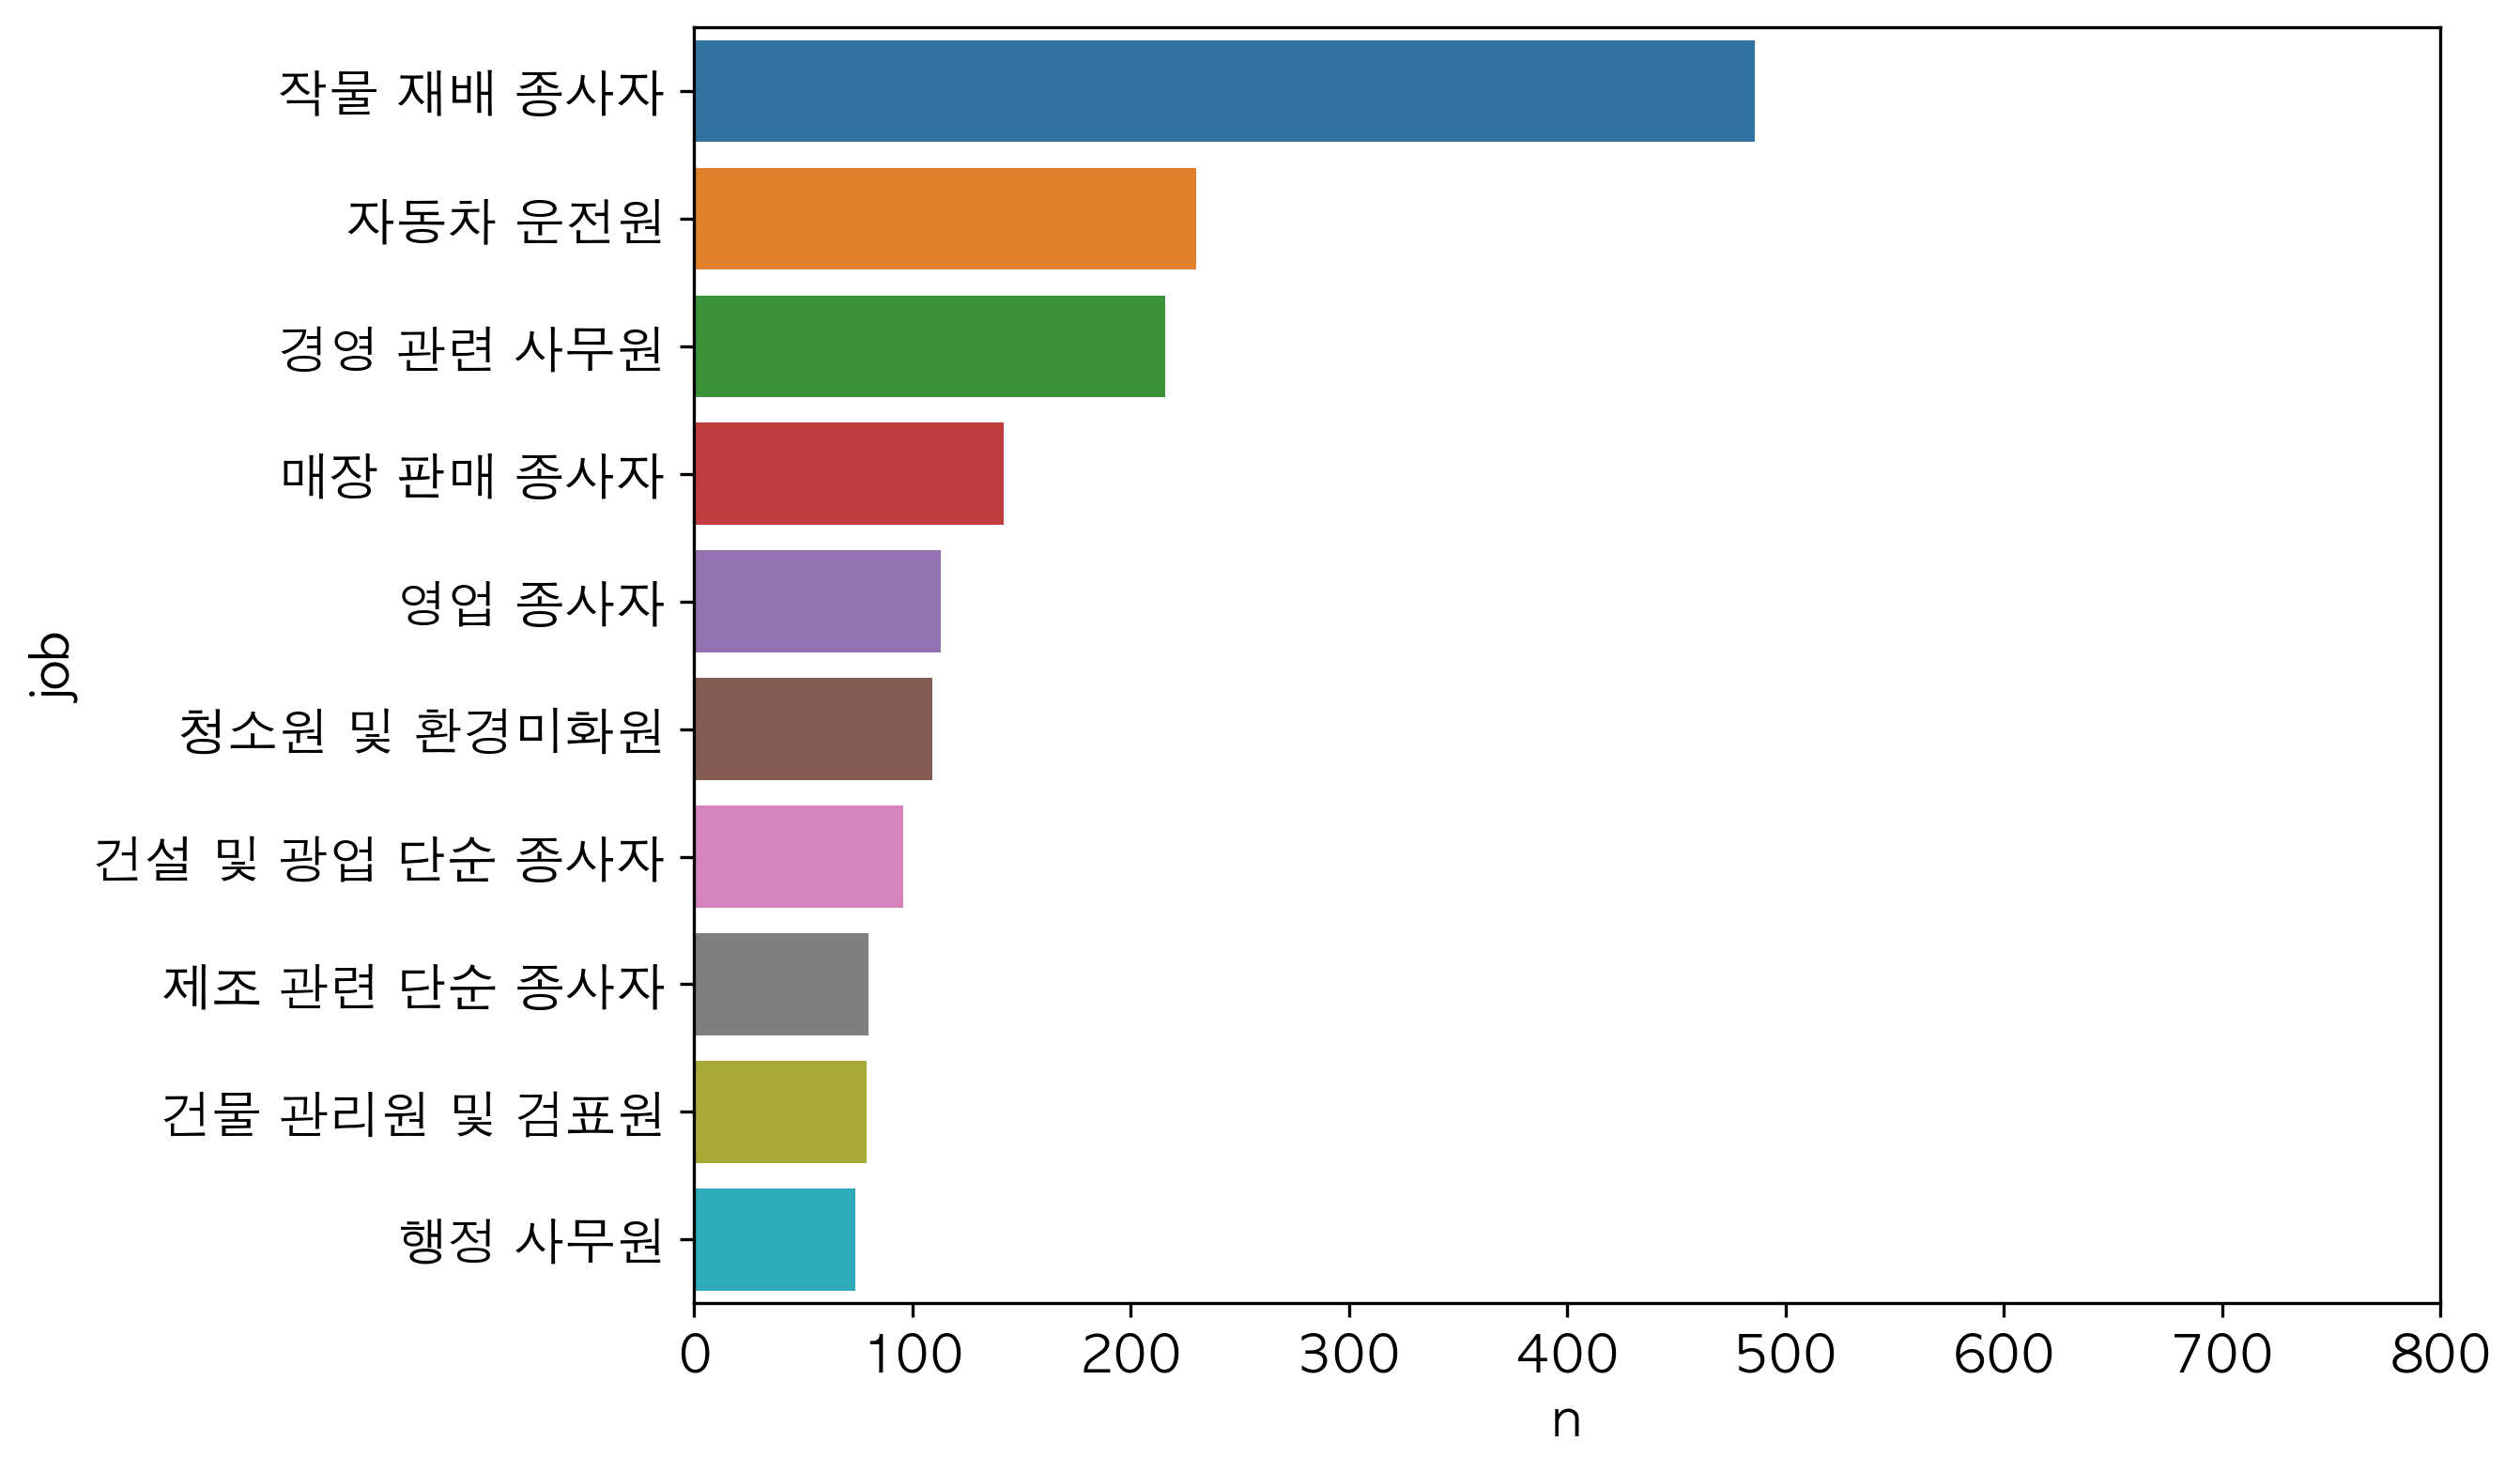

In [69]:
# 남성 직업 빈도 막대 그래프 만들기
sns.barplot(data = job_male, y = 'job', x = 'n').set(xlim = (0, 800))

[(0.0, 500.0)]

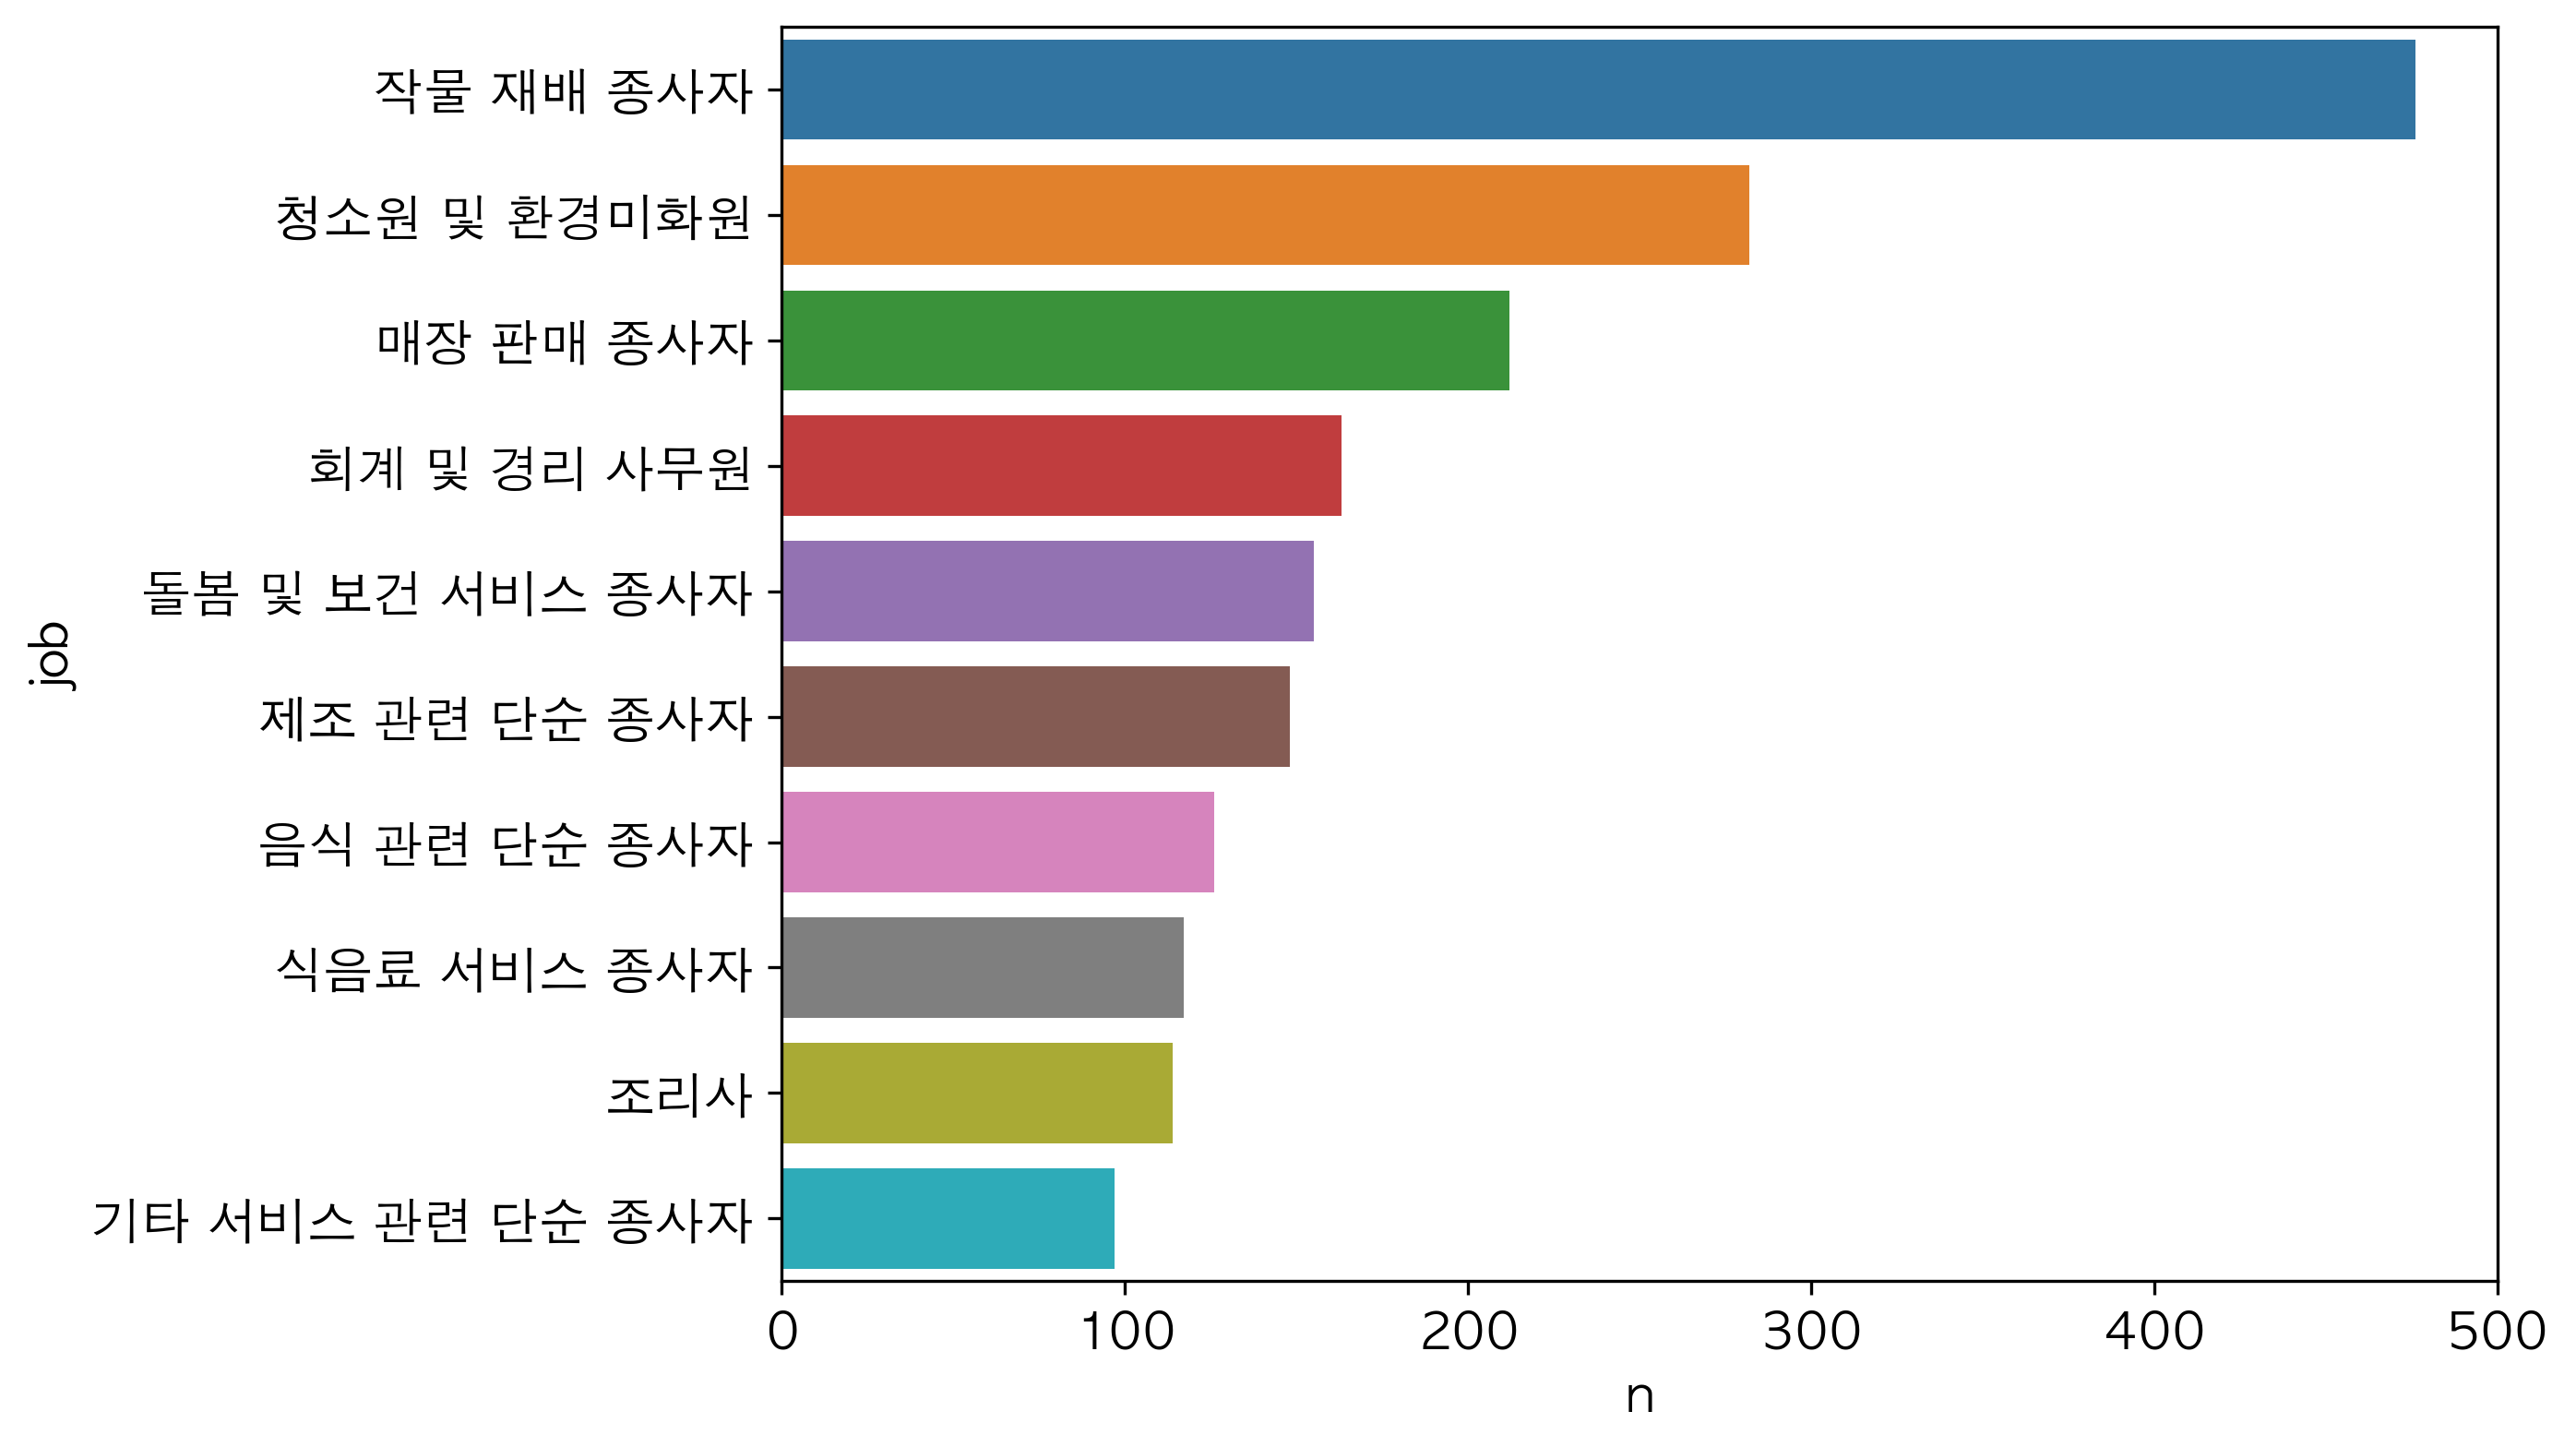

In [70]:
sns.barplot(data = job_female, y = 'job', x = 'n').set(xlim = (0, 500))

## 09-8 종교 유무에 따른 이혼율 - 종교가 있으면 이혼을 덜 할까 ?

### 종교 변수 검토 및 전처리

#### 1. 변수검토하기

In [71]:
welfare['religion'].dtypes

dtype('float64')

In [72]:
welfare['religion'].value_counts()

2.0    7815
1.0    6603
Name: religion, dtype: int64

#### 2. 전처리

In [73]:
# 종교 유무 이름 부여
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')

# 빈도 구하기
welfare['religion'].value_counts()

no     7815
yes    6603
Name: religion, dtype: int64

<AxesSubplot:xlabel='religion', ylabel='count'>

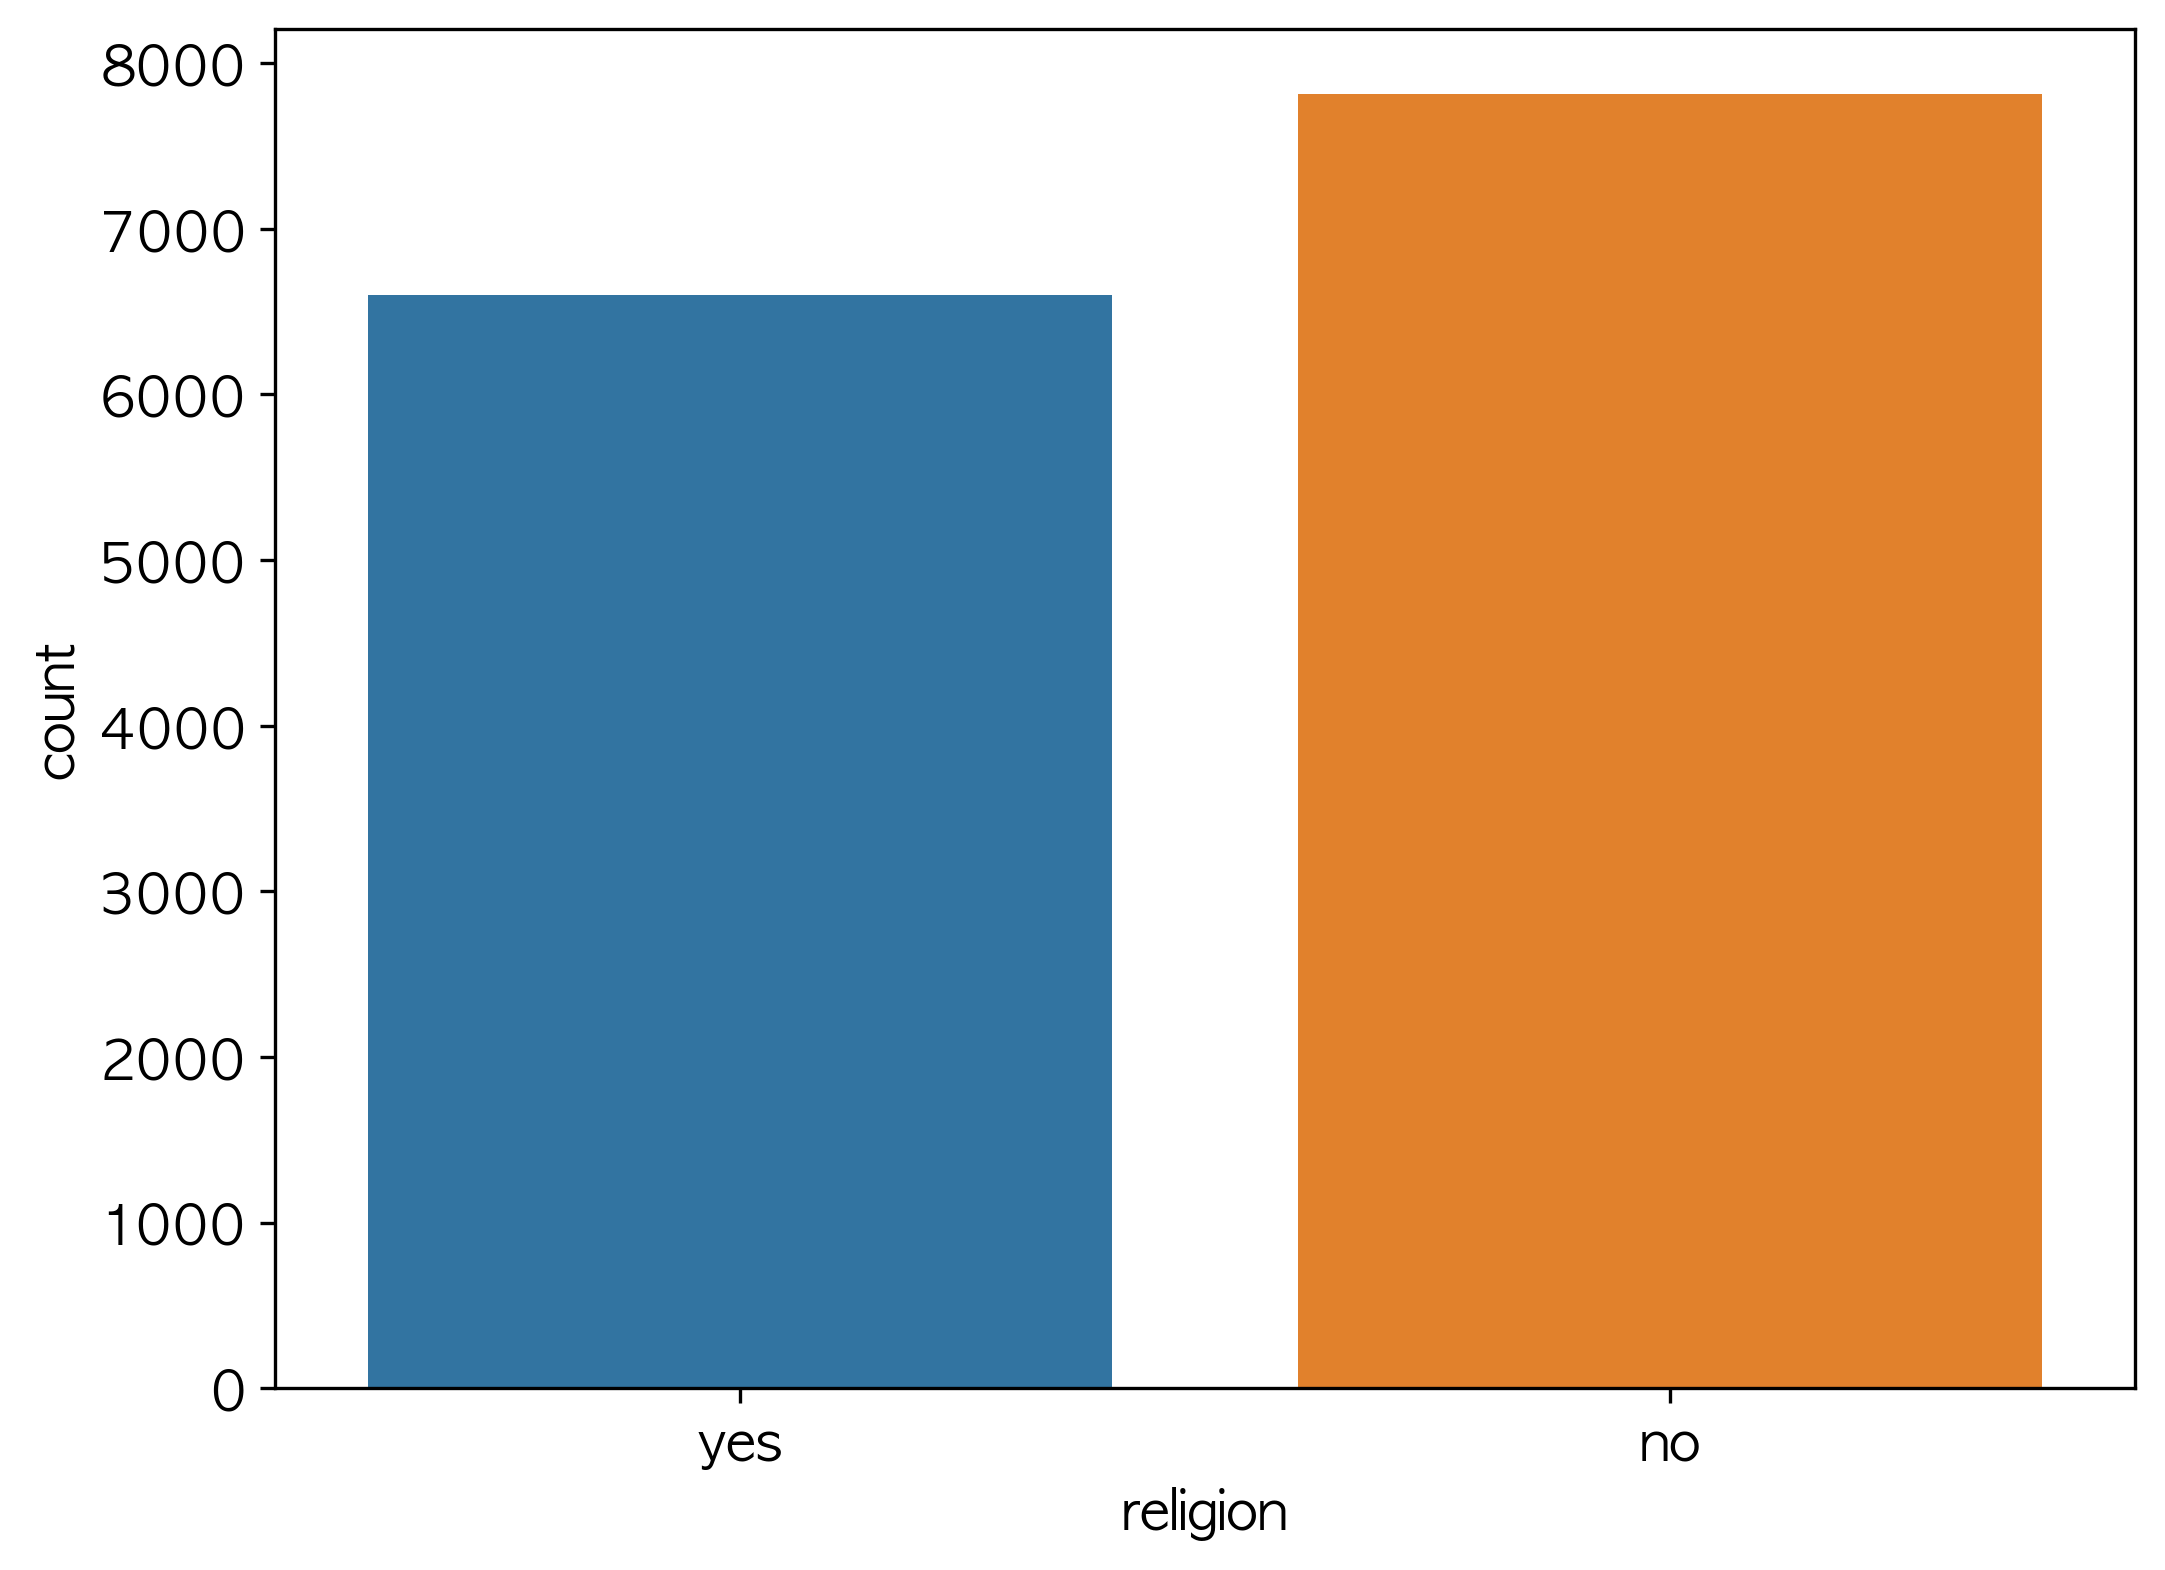

In [74]:
# barplot
sns.countplot(data = welfare, x = 'religion')

### 혼인 상태 변수 및 검토 및 전처리하기

#### 1. 변수 검토하기

In [75]:
welfare['marriage_type'].dtypes

dtype('float64')

In [76]:
welfare['marriage_type'].value_counts()

1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: marriage_type, dtype: int64

#### 2. 파생변수 만들기 - 이혼 여부

In [77]:
# 이혼여부 변수 만들기
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage',
                              np.where(welfare['marriage_type'] == 3, 'divorce',
                                      'etc'))

In [78]:
# 이혼 여부별 빈도
n_divorce = welfare.groupby('marriage', as_index = False)\
.agg(n = ('marriage', 'count'))

n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


<AxesSubplot:xlabel='marriage', ylabel='n'>

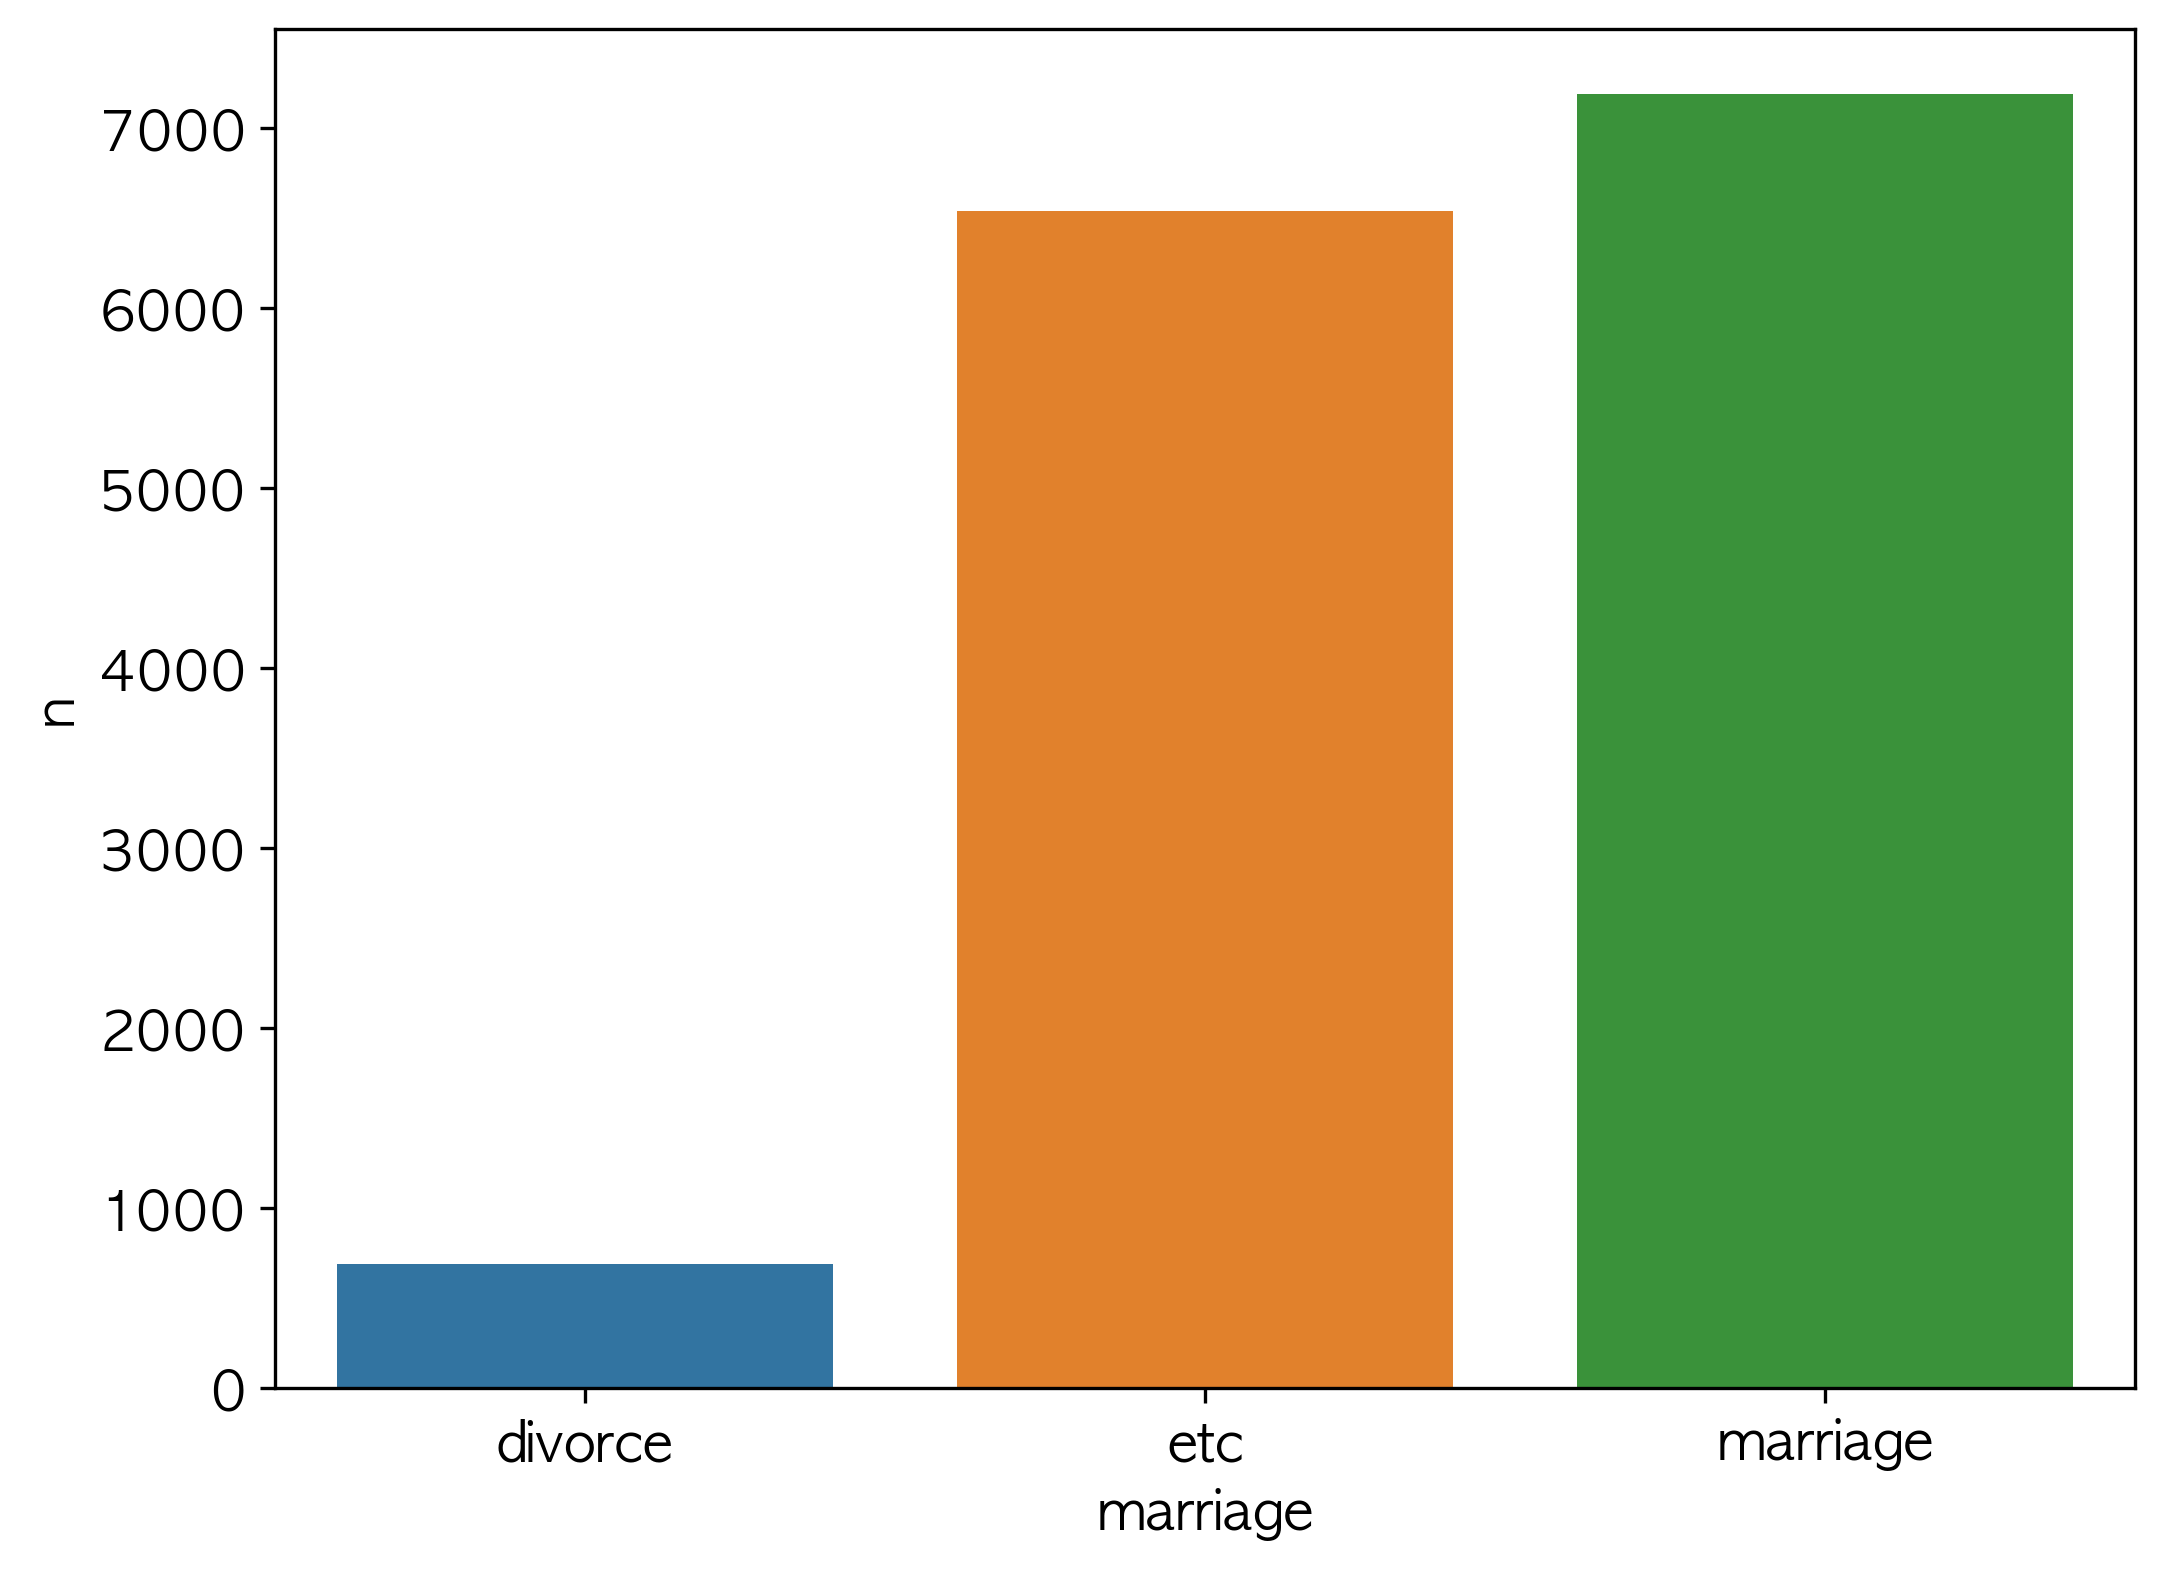

In [79]:
# barplot
sns.barplot(data = n_divorce, x = 'marriage', y = 'n')

### 종교 유무에 따른 이혼율 분석하기

#### 1. 종교 유무에 따른 이혼율표 만들기

In [80]:
real_div = welfare.query('marriage != "etc"') \
.groupby('religion', as_index = False)\
['marriage'] \
.value_counts(normalize = True)

real_div

,religion,marriage,proportion
0,no,marriage,0.905045
1,no,divorce,0.094955
2,yes,marriage,0.920469
3,yes,divorce,0.079531


#### 2. 그래프 만들기

In [81]:
real_div = real_div.query('marriage == "divorce"') \
.assign(proportion = real_div['proportion'] * 100) \
.round(1)

real_div

,religion,marriage,proportion
1,no,divorce,9.5
3,yes,divorce,8.0


<AxesSubplot:xlabel='religion', ylabel='proportion'>

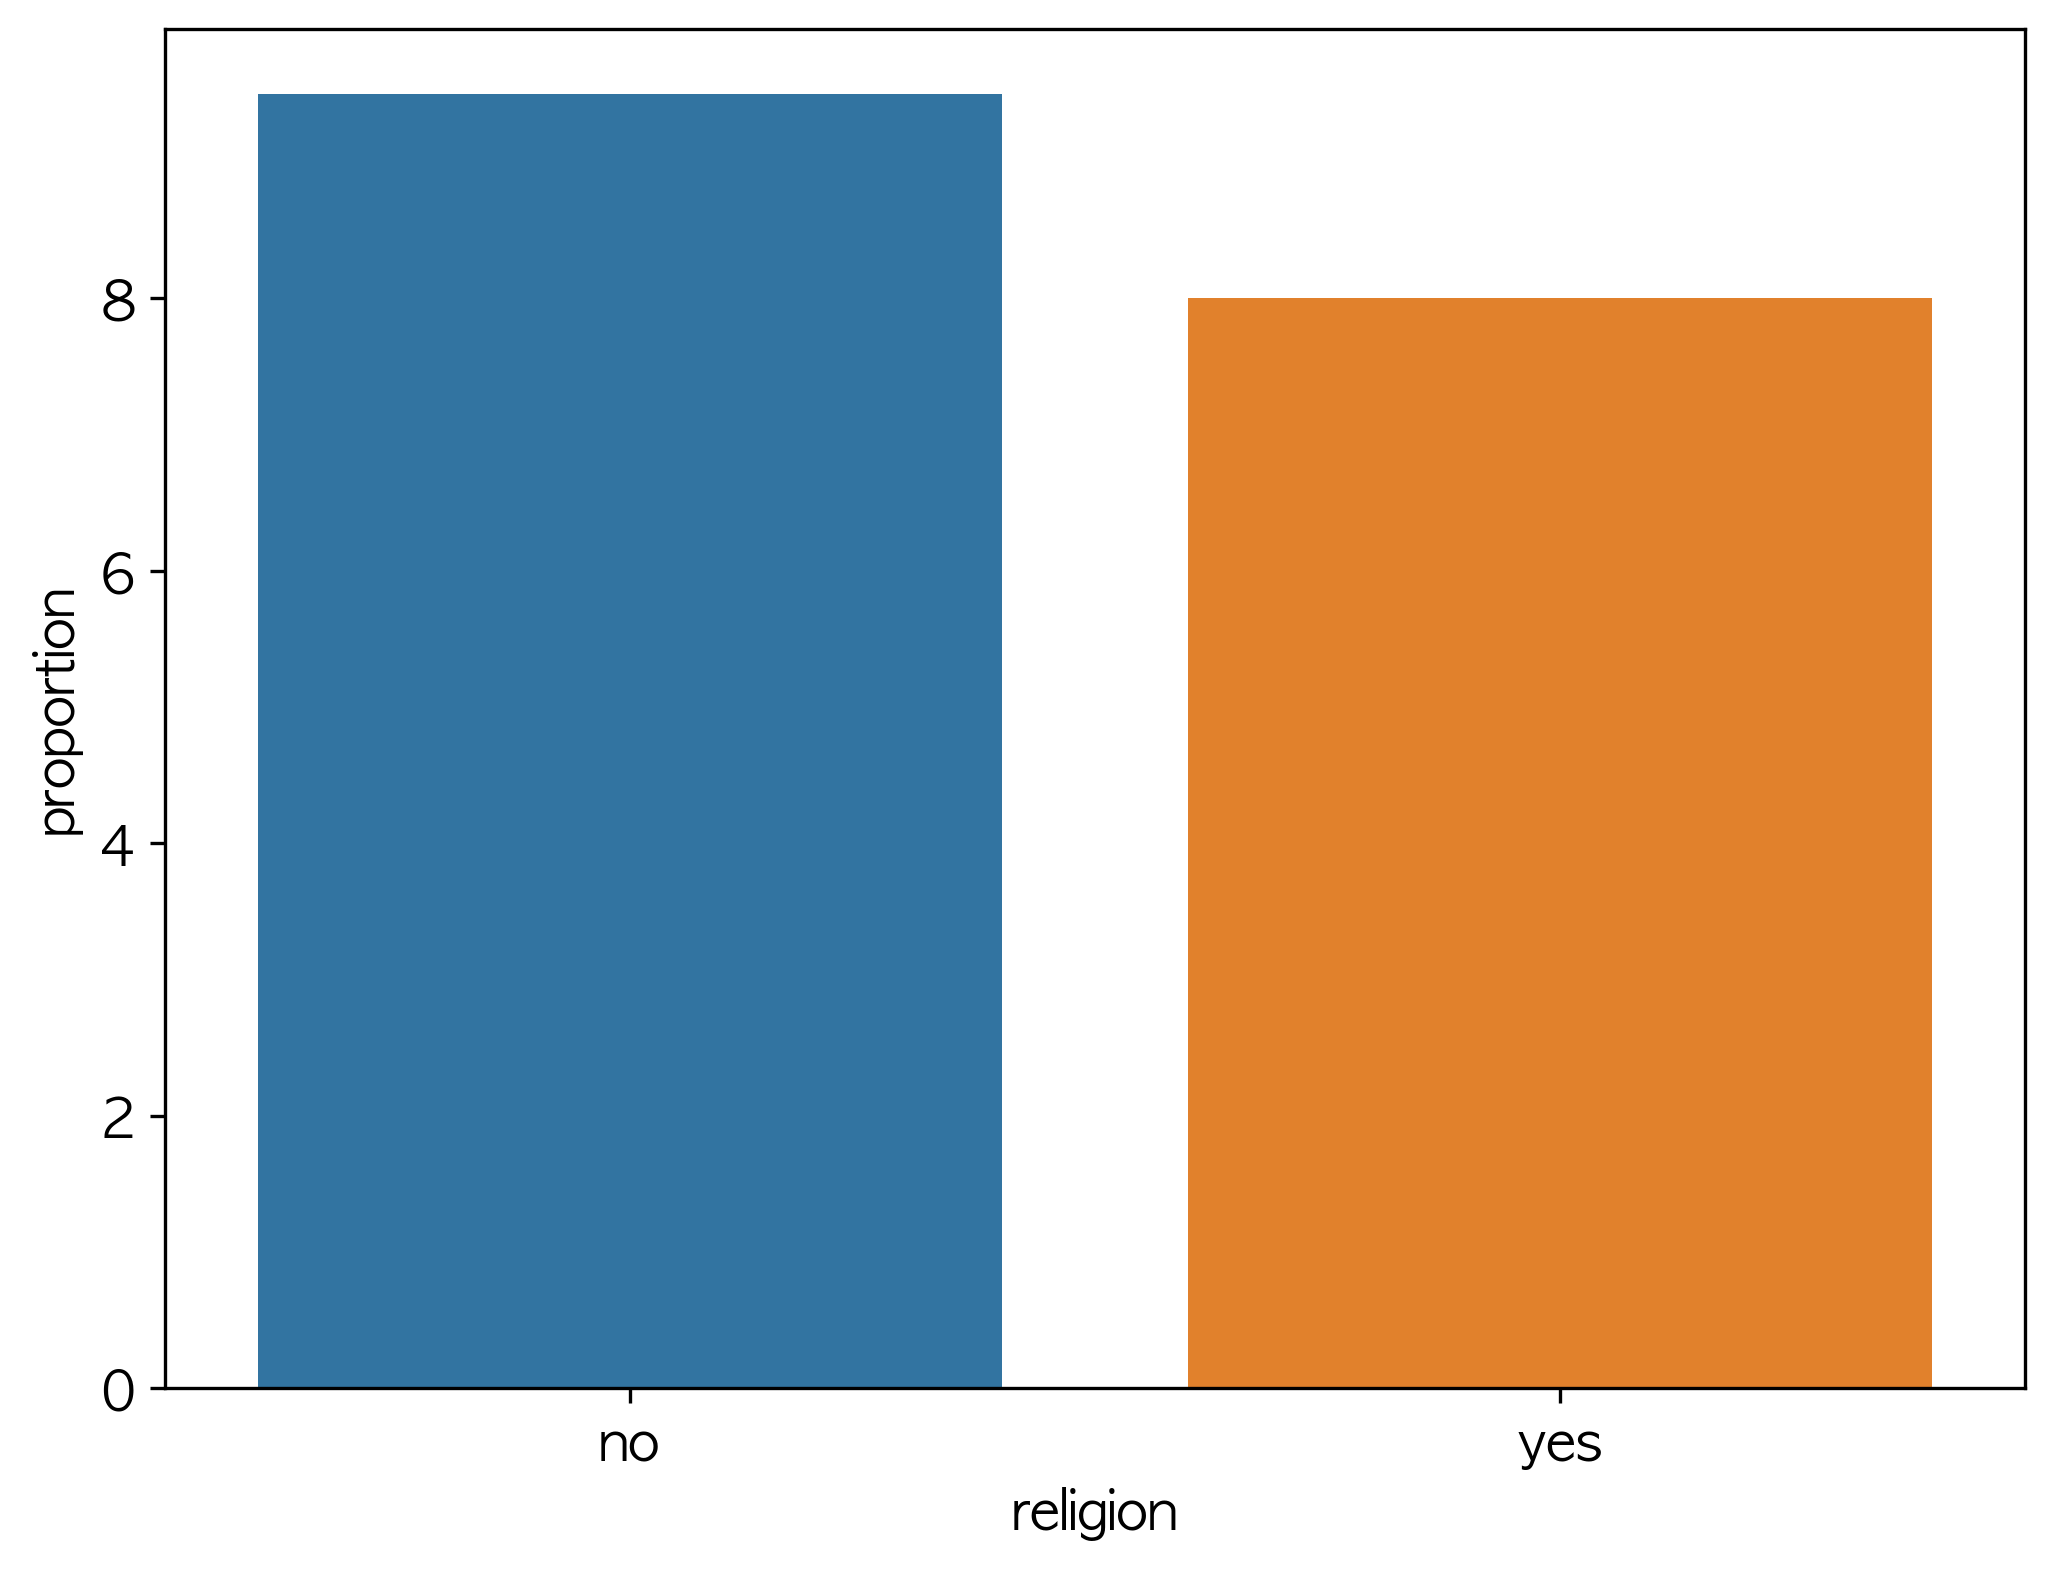

In [82]:
sns.barplot(data = real_div, x = 'religion', y = 'proportion')

### 연령대 및 종교 유무에 따른 이혼율 분석하기

#### 1. 연령대별 이혼율표 만들기

In [83]:
age_div = welfare.query('marriage != "etc"') \
.groupby('ageg', as_index = False)\
['marriage']\
.value_counts(normalize = True)

age_div

,ageg,marriage,proportion
0,middle,marriage,0.910302
1,middle,divorce,0.089698
2,old,marriage,0.914220
3,old,divorce,0.085780
4,young,marriage,0.950000
5,young,divorce,0.050000


In [84]:
# 연령대 및 이혼 여부별 빈도
age_div = welfare.query('marriage != "etc"') \
.groupby('ageg', as_index = False)\
['marriage']\
.value_counts()

In [85]:
age_div

,ageg,marriage,count
0,middle,marriage,3552
1,middle,divorce,350
2,old,marriage,3581
3,old,divorce,336
4,young,marriage,57
5,young,divorce,3


#### 2. 연령대별 이혼률 그래프 만들기

In [93]:
# 초년층 제외, 이혼 추출
# 백분율로 바꾸기
# 반올림
age_div = age_div.query('ageg != "young" & marriage == "divorce"') \
                 .assign(proportion = age_div['proportion'] * 100) \
                 .round(1)
age_div

KeyError: 'proportion'

In [90]:
sns.barplot(data = age_div, x = "ageg", y = 'proportion')

ValueError: Could not interpret input 'proportion'

### 3. 연령대 및 종교 유무에 따른 이혼율표 만들기

In [92]:
# etc 제외, 초년층 제외
# ageg, religion별 분리
# marriage 추출
# 비율 구하기
age_rel_div = welfare.query('marriage != "etc" & ageg != "young"') \
                     .groupby(['ageg', 'religion'], as_index = False) \
                     ['marriage'] \
                     .value_counts(normalize = True)
           
age_rel_div


,ageg,religion,marriage,proportion
0,middle,no,marriage,0.904953
1,middle,no,divorce,0.095047
2,middle,yes,marriage,0.917520
3,middle,yes,divorce,0.082480
4,old,no,marriage,0.904382
5,old,no,divorce,0.095618
6,old,yes,marriage,0.922222
7,old,yes,divorce,0.077778


In [94]:
#### 4. 연령대 및 종교 유무에 따른 이혼율 그래프 만들기
# divorce 추출
# 백분율로 바꾸기
# 반올림
age_rel_div = age_rel_div.query('marriage == "divorce"') \
                         .assign(proportion = age_rel_div['proportion'] * 100) \
                         .round(1)
                         
age_rel_div

,ageg,religion,marriage,proportion
1,middle,no,divorce,9.5
3,middle,yes,divorce,8.2
5,old,no,divorce,9.6
7,old,yes,divorce,7.8


In [95]:
# 막대 그래프 만들기
sns.barplot(data = rel_div, x = "religion", y = 'proportion')


NameError: name 'rel_div' is not defined

# 09-9 지역별 연령대 비율 - 어느 지역에 노년층이 많을까 ?

In [96]:
welfare['code_region'].dtypes  # 변수 타입 출력

dtype('float64')

In [97]:
welfare['code_region'].value_counts()  # 빈도 구하기


2.0    3246
7.0    2466
3.0    2448
1.0    2002
4.0    1728
5.0    1391
6.0    1137
Name: code_region, dtype: int64

In [98]:
# 지역 코드 목록 만들기
list_region = pd.DataFrame({'code_region' : [1, 2, 3, 4, 5, 6, 7],
                            'region'      : ['서울',
                                             '수도권(인천/경기)',
                                             '부산/경남/울산',
                                             '대구/경북',
                                             '대전/충남',
                                             '강원/충북',
                                             '광주/전남/전북/제주도']})
list_region

,code_region,region
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [99]:
# 지역명 변수 추가
welfare = welfare.merge(list_region, how = 'left', on = 'code_region')
welfare[['code_region', 'region']].head()


,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울


In [100]:
# region별 분리
# ageg 추출
# 비율 구하기
region_ageg = welfare.groupby('region', as_index = False) \
                     ['ageg'] \
                     .value_counts(normalize = True)
region_ageg

,region,ageg,proportion
0,강원/충북,old,0.459103
1,강원/충북,middle,0.308707
2,강원/충북,young,0.232190
3,광주/전남/전북/제주도,old,0.449311
4,광주/전남/전북/제주도,middle,0.317924
5,광주/전남/전북/제주도,young,0.232766
6,대구/경북,old,0.504051
7,대구/경북,middle,0.296296
8,대구/경북,young,0.199653
9,대전/충남,old,0.413372


In [101]:
# 백분율로 바꾸기
# 반올림
region_ageg = region_ageg.assign(proportion = region_ageg['proportion'] * 100) \
                         .round(1)
region_ageg

,region,ageg,proportion
0,강원/충북,old,45.9
1,강원/충북,middle,30.9
2,강원/충북,young,23.2
3,광주/전남/전북/제주도,old,44.9
4,광주/전남/전북/제주도,middle,31.8
5,광주/전남/전북/제주도,young,23.3
6,대구/경북,old,50.4
7,대구/경북,middle,29.6
8,대구/경북,young,20.0
9,대전/충남,old,41.3


<AxesSubplot:xlabel='proportion', ylabel='region'>

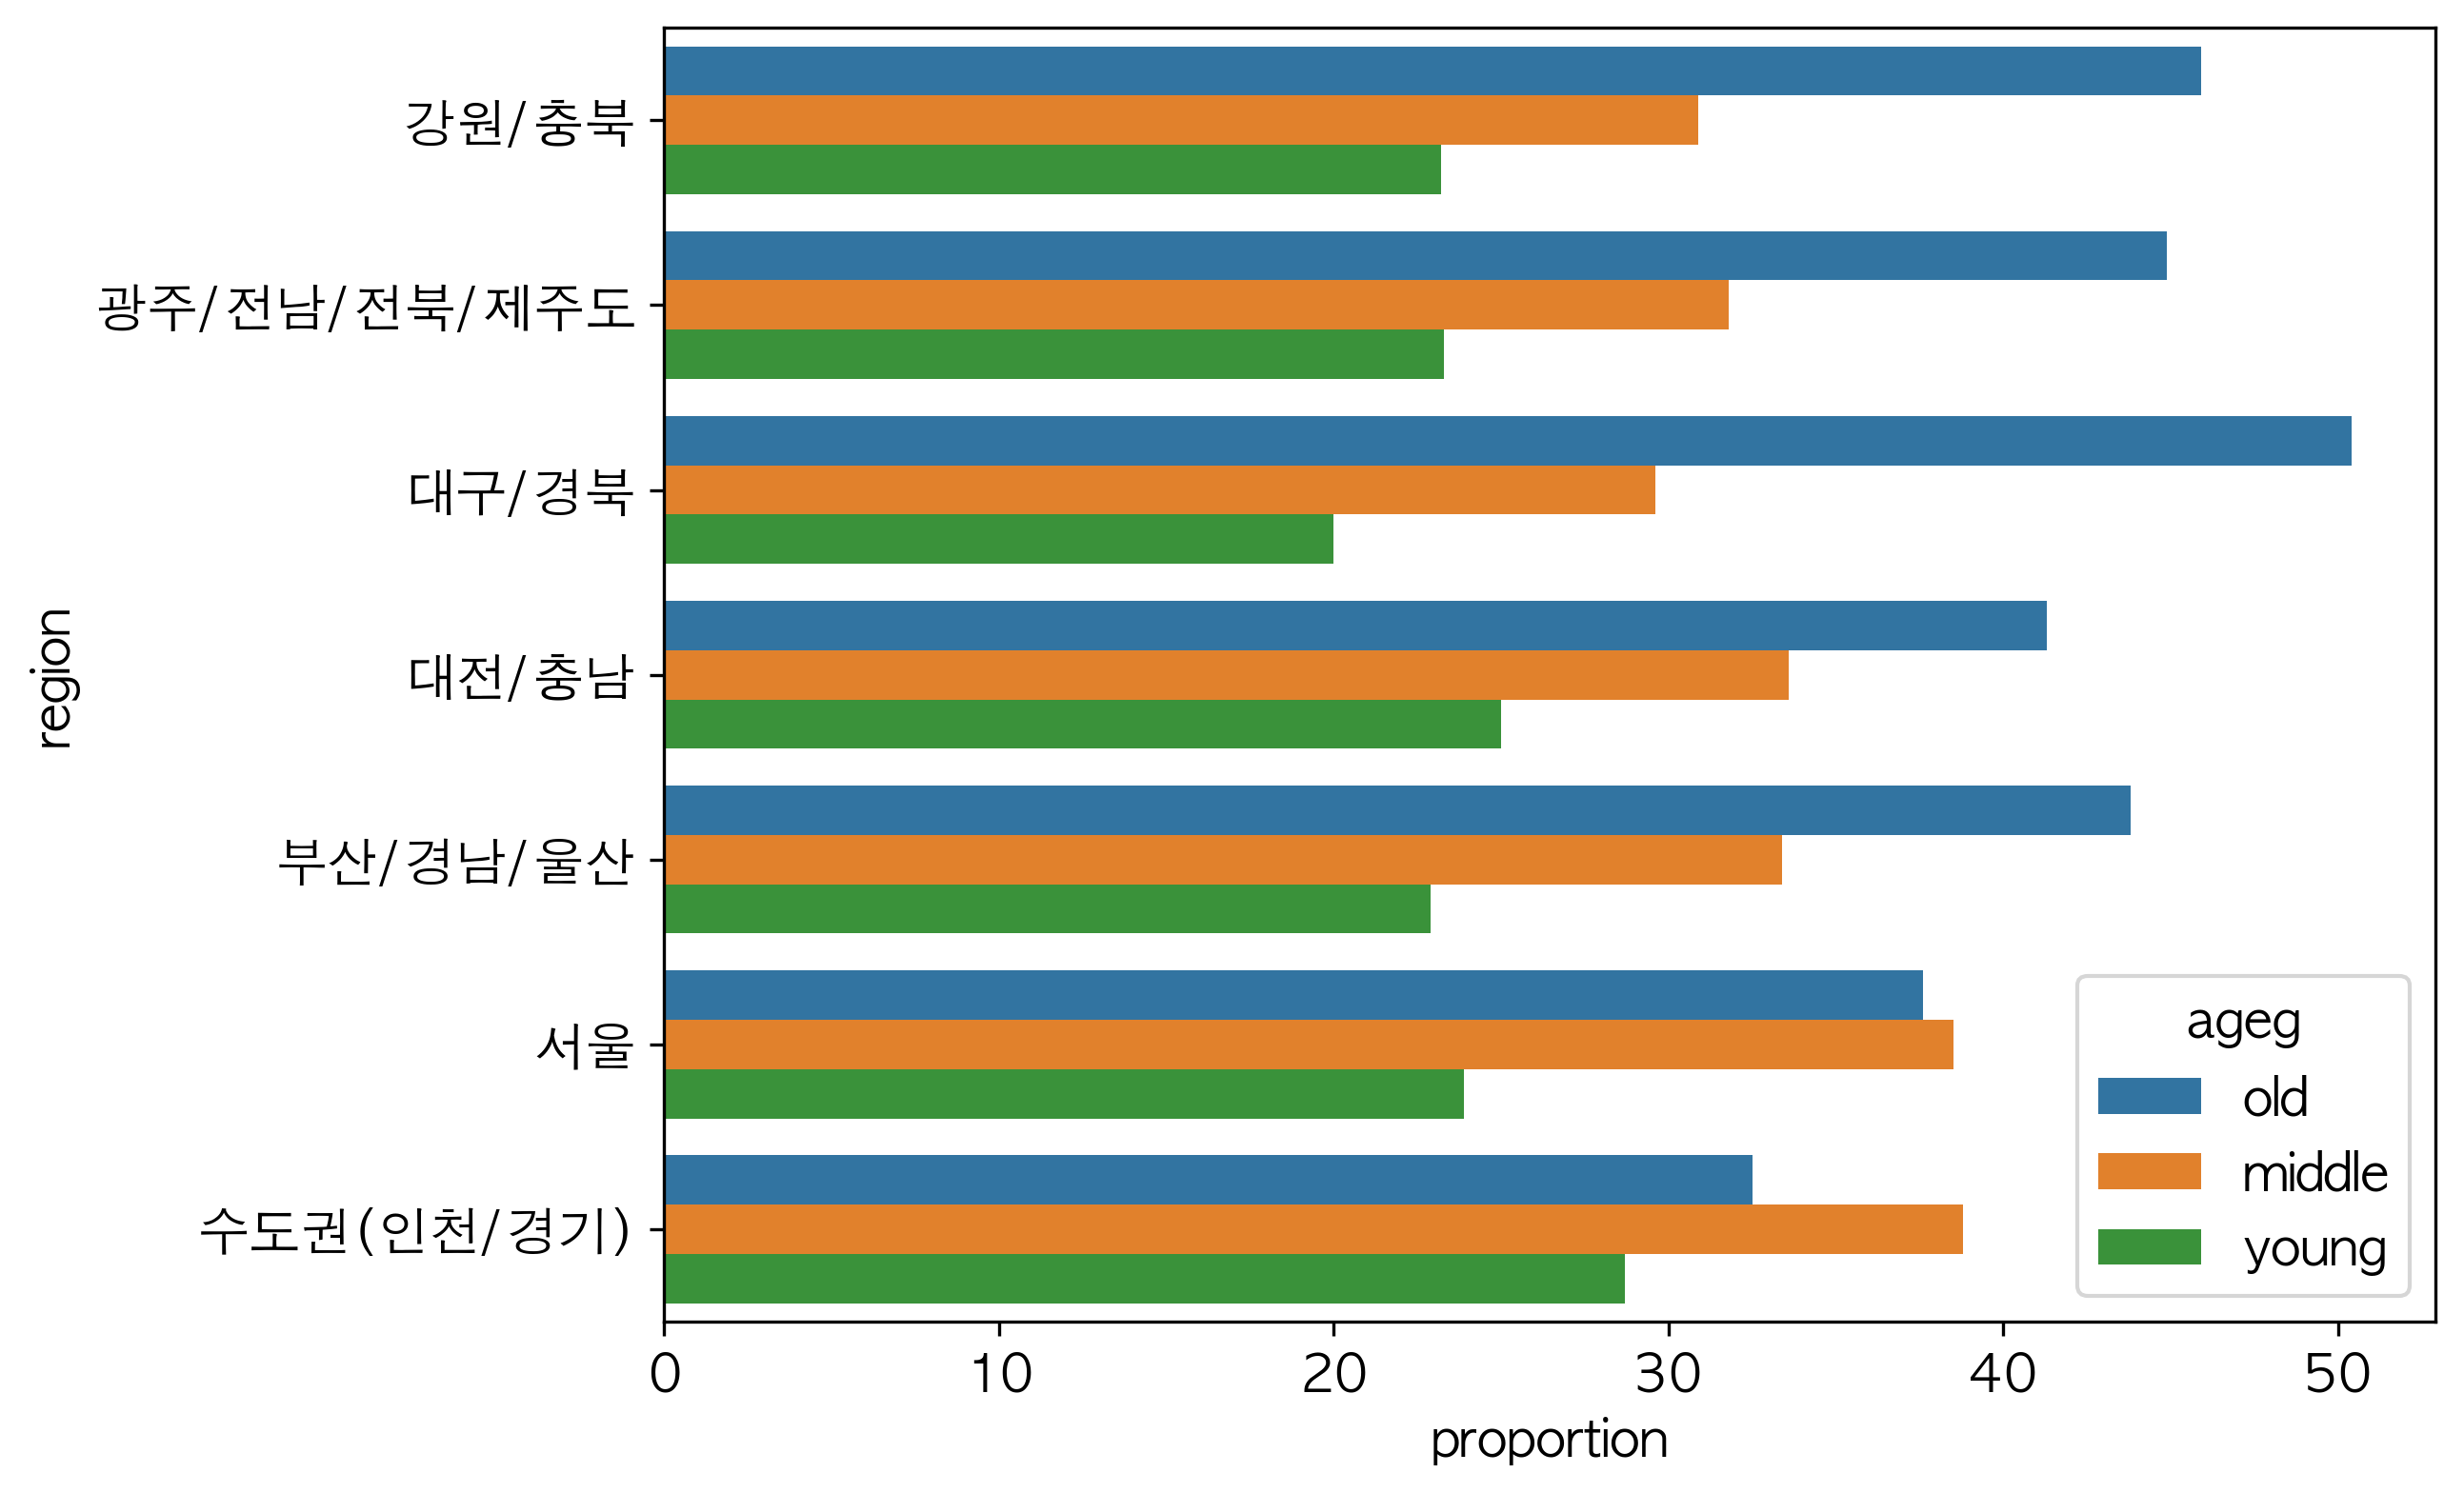

In [102]:
# 막대 그래프 만들기
sns.barplot(data = region_ageg, y = 'region', x = 'proportion', hue = 'ageg')

In [103]:
# 피벗
pivot_df = region_ageg[['region', 'ageg', 'proportion']].pivot(index   = 'region',
                                                               columns = 'ageg',
                                                               values  = 'proportion')
pivot_df

ageg,middle,old,young
region,,,
강원/충북,30.9,45.9,23.2
광주/전남/전북/제주도,31.8,44.9,23.3
대구/경북,29.6,50.4,20.0
대전/충남,33.6,41.3,25.0
부산/경남/울산,33.4,43.8,22.9
서울,38.5,37.6,23.9
수도권(인천/경기),38.8,32.5,28.7


<AxesSubplot:ylabel='region'>

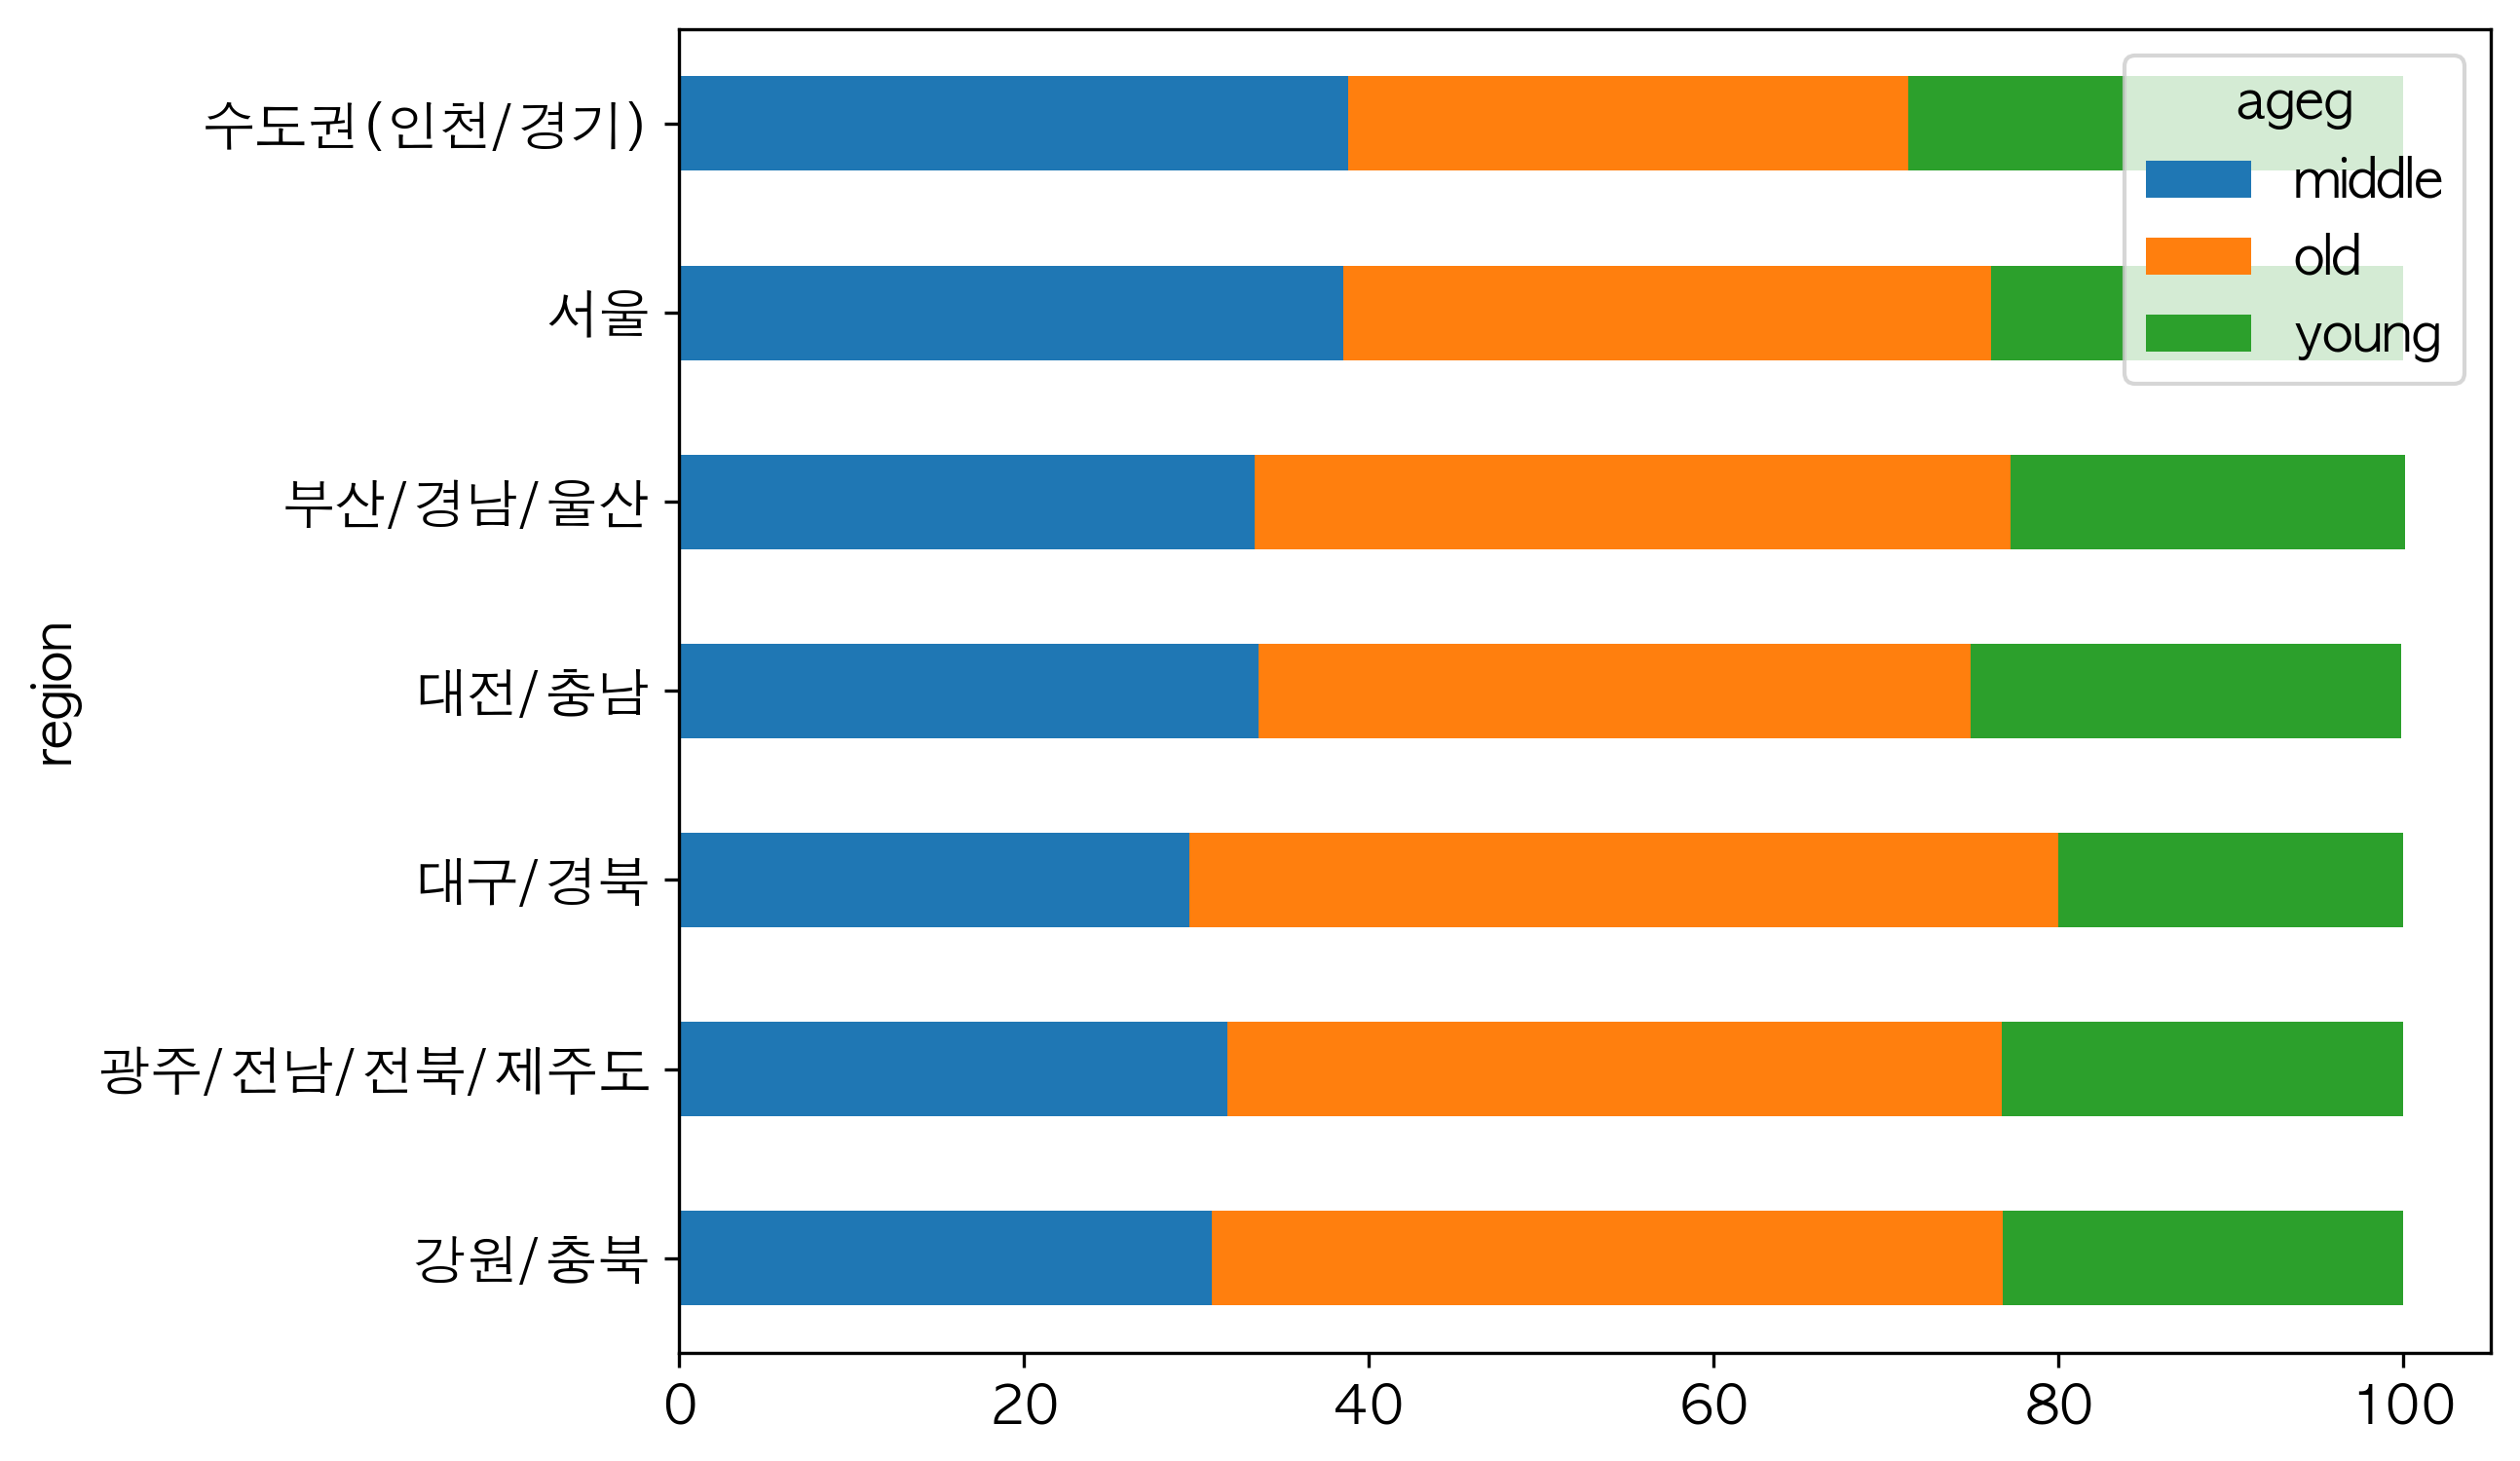

In [104]:
# 가로 막대 그래프 만들기
pivot_df.plot.barh(stacked = True)


In [105]:
# 노년층 비율 기준 정렬, 변수 순서 바꾸기
reorder_df = pivot_df.sort_values('old')[['young', 'middle', 'old']]
reorder_df


ageg,young,middle,old
region,,,
수도권(인천/경기),28.7,38.8,32.5
서울,23.9,38.5,37.6
대전/충남,25.0,33.6,41.3
부산/경남/울산,22.9,33.4,43.8
광주/전남/전북/제주도,23.3,31.8,44.9
강원/충북,23.2,30.9,45.9
대구/경북,20.0,29.6,50.4


<AxesSubplot:ylabel='region'>

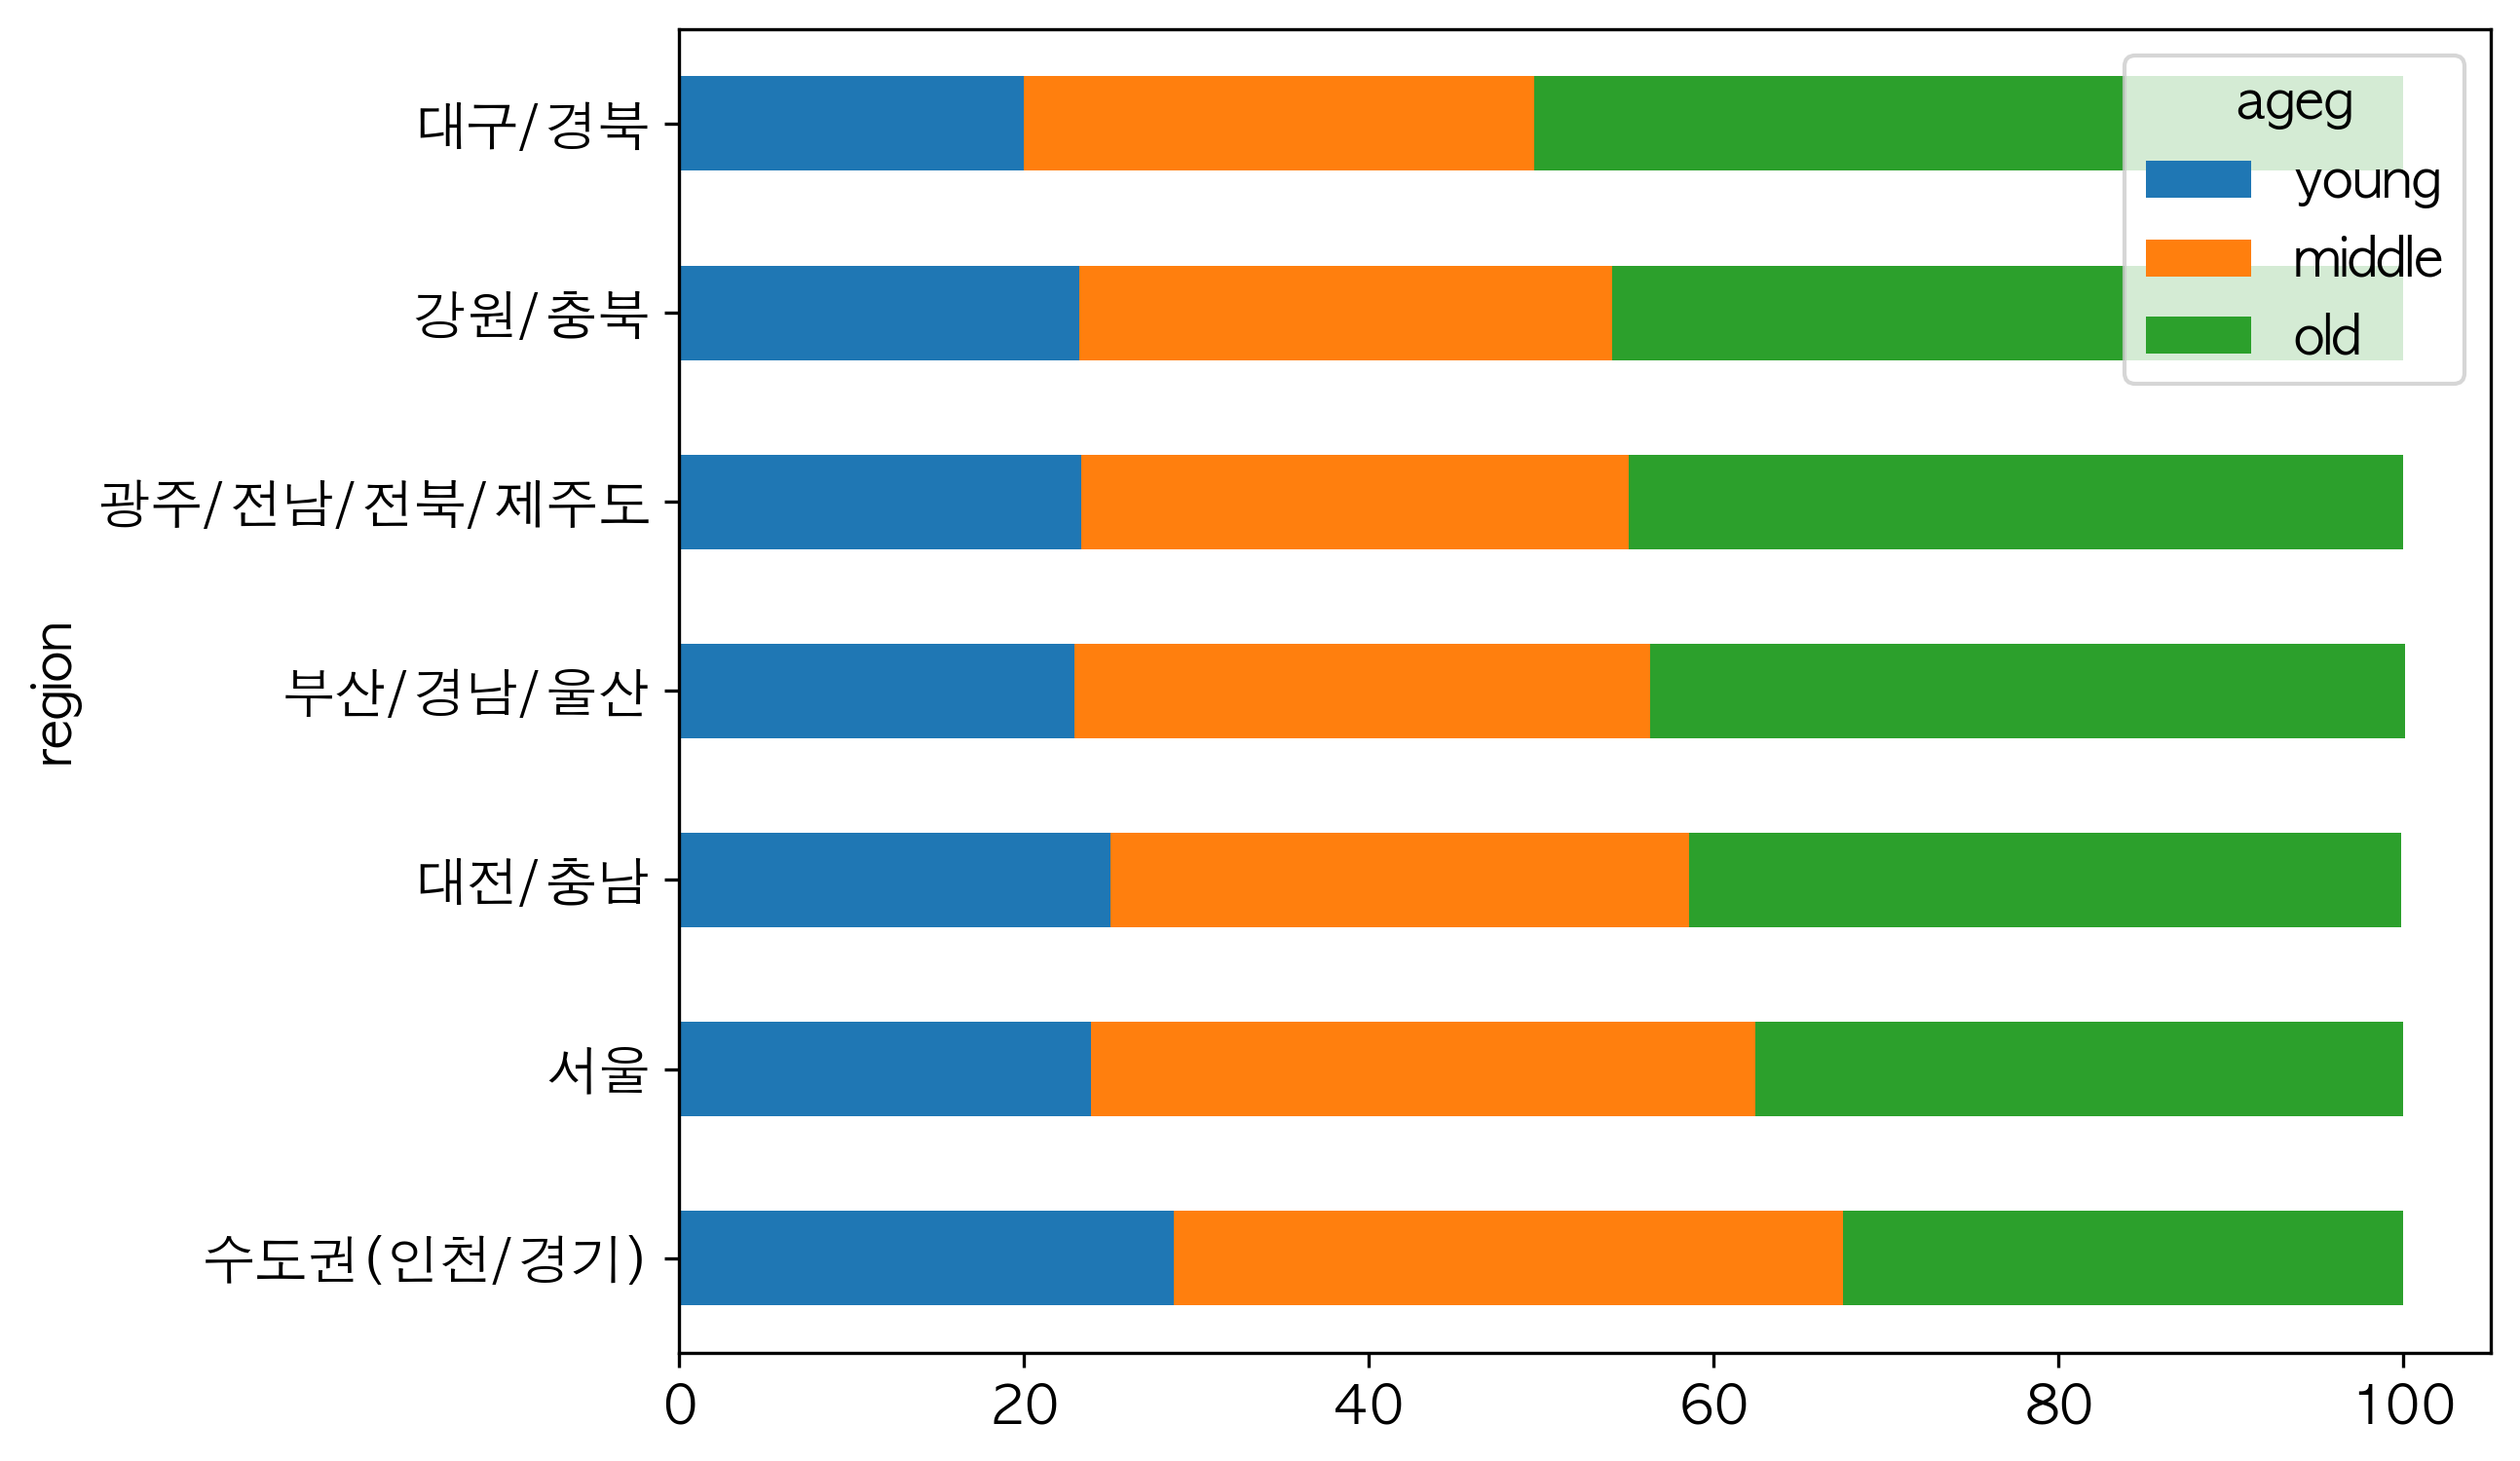

In [106]:

# 누적 가로 막대 그래프 만들기
reorder_df.plot.barh(stacked = True)